### Automotive loans default forecast with ML classifiers: intro

The global automotive finance market, projected to grow from $245.62 billion in 2021 to  USD 519.21 billion by 2032([Precedence Research, 2023](#ref1)), is driven by the emergence of online finance applications that enable easy loan comparisons and applications([Fortune Business Insights, 2022](#ref2)). Developing countries present promising target markets as demand saturates in developed nations. With approximately 92% of new cars and a growing number of used cars purchased using finance agreements, concerns about potential defaults are rising due to escalating living costs.

Financial institutions face significant losses from vehicle loan defaults, leading to tightened loan underwriting and higher rejection rates([Automotive Management online magazine, 2022](#ref3)). This situation underscores the necessity for a more accurate credit risk scoring model and warrants an in-depth study to determine the factors contributing to vehicle loan defaults.

The project utilizes data from the Indian Financial Data Science Hackathon 2019([Analytics Vidhya](#ref4), [Mishra, S.](#ref5), [Bhavsar, N., 2019](#ref6)), where 470 teams competed, and the dataset has since been downloaded 1,960 times on Kaggle, resulting in seven published projects. The hackathon's AUC-ROC evaluation method recorded a leader's result of 0.67317. Given that a few years have passed since 2019, this project aims to explore advancements that could improve predictions. As a first-time endeavor in Financial Data Science, the primary objective is to gain experience with Data Science tools and techniques while leveraging clean and well-researched data.

The goal is to learn and optimize three classifying algorithms at an intermediate level: Logistic Regression, Support Vector Machine, and the recently popularized GXBoost, which is known for its exceptional performance([Bentéjac, C., Csörgő, A. and Martínez-Muñoz, G., 2021](#ref7)). The project will compare results using the competition's metrics. While Logistic Regression and Support Vector Machines will not be explained in detail, a brief overview of GXBoost will be provided. GXBoost is a scalable ensemble technique based on gradient boosting that has proven to be a dependable and efficient machine learning challenge solver([Rao, C., Liu, Y. and Goh, M., 2022](#ref8)).



### Imports and the data loading

In [61]:
# to improve computing speed  for svm - should be imported before sci-kit learn 
from sklearnex import patch_sklearn 
patch_sklearn()

# major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_palette('bright')  # Replace 'palette_name' with the desired palette, e.g. 'deep', 'muted', 'bright', 'pastel', 'dark', or 'colorblind'.
sns.set_style('whitegrid')  # Replace 'style_name' with the desired style, e.g. 'white', 'dark', 'whitegrid', 'darkgrid', or 'ticks'.
%matplotlib inline




#warnings 
import warnings
warnings.filterwarnings('ignore')

# to test if the target variable depends on the categorical feature
from scipy.stats import chi2_contingency

# to change objects to datetime stamps
from datetime import datetime
#import matplotlib.dates as mdates

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import scale

# To encode labels
from sklearn.preprocessing import LabelEncoder

# to select the principal features
from sklearn.feature_selection import mutual_info_regression

# This will be required to scale the data.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

# for treating unbalanced classes
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN  # alternative to smote


# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# for logistic regression
from sklearn.linear_model import LogisticRegression


# all the metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# for svm model
from sklearn import svm
from sklearn.svm import SVC

#for GX boost algoritm
import xgboost as xgb
from xgboost import XGBClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [59]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

In [60]:
train = pd.read_csv('train_git.csv')     # original data train set to be used in the work

DF = pd.DataFrame(train)
DF.head(7)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [61]:
print(DF.shape) # the dataframe shape


(233154, 41)


### Data preparation: missing values treatment and transformations

In [4]:
dRows = DF[DF.duplicated()]    # check if any duplicates
dRows

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default


Certain columns consist of distinct identification numbers that hold no significance in the analysis. Therefore, we can promptly discard them.

* UniqueID                                       
* Current_pincode_ID                              


In [5]:
DF = DF.drop(['UniqueID', 'Current_pincode_ID', ], axis=1)
print(DF.shape) # check the dimensions again

(233154, 39)


In [6]:
# find and locate missing values
print('Does the dataframe have missing missing values?', DF.isnull().values.any())
print('How many?', DF.isnull().sum().sum())


DF.info()

Does the dataframe have missing missing values? True
How many? 7661
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Date.of.Birth                        233154 non-null  object 
 7   Employment.Type                      225493 non-null  object 
 8   DisbursalDate                        233154 non-null  object 
 9   State_ID                             233154 non-null  int64  
 10  Employee_cod

Missing values are systematically distributed in the feature: 'Employment.Type'

We can analyze the impact of the employment status variable on loan defaults by creating a crosstab. The variable has three categories: Salaried, Self-employed, and NaN.

In [7]:

Crosstab=pd.crosstab(index=DF['Employment.Type'],columns=DF['loan_default'])
print(Crosstab)

ChiSqRes = chi2_contingency(Crosstab)
print(ChiSqRes)

loan_default         0      1
Employment.Type              
Salaried         77948  19910
Self employed    98578  29057
Chi2ContingencyResult(statistic=190.6579236758318, pvalue=2.2841351170641894e-43, dof=1, expected_freq=array([[76607.6166799, 21250.3833201],
       [99918.3833201, 27716.6166799]]))


The p-value of 2.2841351170641894e-43 with one degree of freedom indicates that the employment status factor is a significant explanatory variable with a high level of confidence. We will substitute NaN with an "unknown" label and to confirm that there are no other NaN values.

In [8]:
DFd = DF.fillna('unknown')
DF.isnull().values.any()

True

Confirm significance of the  'Employment.Type' factors

In [9]:
Crosstab=pd.crosstab(index=DFd['Employment.Type'],columns=DF['loan_default'])
print(Crosstab)

ChiSqRes = chi2_contingency(Crosstab)
print(ChiSqRes)

loan_default         0      1
Employment.Type              
Salaried         77948  19910
Self employed    98578  29057
unknown           6017   1644
Chi2ContingencyResult(statistic=191.1398528340361, pvalue=3.1225422343284505e-42, dof=2, expected_freq=array([[76615.85430231, 21242.14569769],
       [99929.12755089, 27705.87244911],
       [ 5998.0181468 ,  1662.9818532 ]]))


As the feature 'Employment.Type' contains just three labels and for the purpose of the investigation, we can utilize the dummies technique to encode Employment.

In [10]:
DFd1 = pd.get_dummies(DFd, columns = ['Employment.Type'])
DFd1.drop(['Employment.Type_Salaried'], axis =1, inplace = True)

DFd1.head(1)


,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Date.of.Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Self employed,Employment.Type_unknown
0,50578,58400,89.55,67,22807,45,01-01-84,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,False,False


Convert the objects to dates:

8   Date.of.Birth                        233154 non-null  object 

10  DisbursalDate                        233154 non-null  object

In [11]:
DFd1['Date.of.Birth'] = pd.to_datetime(DFd1['Date.of.Birth'], format='%d-%m-%y')
DFd1['DisbursalDate'] =  pd.to_datetime(DFd1['DisbursalDate'], format='%d-%m-%y')


# after long investigation have found that the date features are not correlated to the loan_default vector.

DFd1.drop(['Date.of.Birth', 'DisbursalDate'], axis=1, inplace=True)


Convert the objects to integers: 

37  AVERAGE.ACCT.AGE                     112392 non-null  object 

38  CREDIT.HISTORY.LENGTH                112392 non-null  object 


In [12]:
# calculate total months from the columns
DFd1['AVERAGE.ACCT.AGE.M'] = DFd1['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split('yrs')[0])*12 + int(x.split(' ')[1].split('mon')[0]))
DFd1['CREDIT.HISTORY.LENGTH.M'] = DFd1['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split('yrs')[0])*12 + int(x.split(' ')[1].split('mon')[0]))

# drop the original columns
DFd1.drop('AVERAGE.ACCT.AGE', axis=1, inplace=True)
DFd1.drop('CREDIT.HISTORY.LENGTH', axis=1, inplace=True)

# display the transformed DataFrame column
print(DFd1['AVERAGE.ACCT.AGE.M'].head(3))
print(DFd1['CREDIT.HISTORY.LENGTH.M'].head(3))

0     0
1    23
2     0
Name: AVERAGE.ACCT.AGE.M, dtype: int64
0     0
1    23
2     0
Name: CREDIT.HISTORY.LENGTH.M, dtype: int64


Lets transform all flags to categorical variables directly, as they already have binary values, to checked whether any flags categories are explanatory for the target variable

In [13]:
categorical_cols = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag','Driving_flag', 'Passport_flag']

DFd1[categorical_cols] = DFd1[categorical_cols].astype("category")  # converts specified columns to categorical

print(DFd1.dtypes)  # check the datatypes

disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
branch_id                                 int64
supplier_id                               int64
manufacturer_id                           int64
State_ID                                  int64
Employee_code_ID                          int64
MobileNo_Avl_Flag                      category
Aadhar_flag                            category
PAN_flag                               category
VoterID_flag                           category
Driving_flag                           category
Passport_flag                          category
PERFORM_CNS.SCORE                         int64
PERFORM_CNS.SCORE.DESCRIPTION            object
PRI.NO.OF.ACCTS                           int64
PRI.ACTIVE.ACCTS                          int64
PRI.OVERDUE.ACCTS                         int64
PRI.CURRENT.BALANCE                       int64
PRI.SANCTIONED.AMOUNT                   

Set column PERFORM_CNS.SCORE.DESCRIPTION' as category and assign values as for , depending on level of perceived risk, with 0 highest.

In [14]:
DFd1['PERFORM_CNS.SCORE.DESCRIPTION'] = DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category')
print(DF['PERFORM_CNS.SCORE.DESCRIPTION'].nunique())
print(DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()) # check if the feature transformed to fit in the model


20
PERFORM_CNS.SCORE.DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on th

In [15]:
replace_dict = {
    'No Bureau History Available': 0,
    'Not Scored: Sufficient History Not Available': 0,
    'Not Scored: Not Enough Info available on the customer': 0,
    'Not Scored: No Activity seen on the customer (Inactive)': 0,
    'Not Scored: No Updates available in last 36 months': 0,
    'Not Scored: Only a Guarantor': 0,
    'Not Scored: More than 50 active Accounts found': 0,
    'M-Very High Risk': 1,
    'L-Very High Risk': 1,
    'K-High Risk': 2,
    'J-High Risk': 2,
    'I-Medium Risk': 3,
    'H-Medium Risk': 3,
    'G-Low Risk': 4,
    'F-Low Risk': 4,
    'E-Low Risk': 4,
    'D-Very Low Risk': 5,
    'C-Very Low Risk': 5,
    'B-Very Low Risk': 5,
    'A-Very Low Risk': 5
}

DFd1['PERFORM_CNS.SCORE.DESCRIPTION'] = DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(replace_dict)
DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].head(3)


0    0
1    3
2    0
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: category
Categories (6, int64): [5, 4, 3, 2, 1, 0]

### EDA and Features Engineering


Lets explore linear correlations between features with Heatmap method, which facilitates all the 40 features visibility.

In [16]:
print(DFd1.shape) 

(233154, 38)


Text(0.5, 1.0, 'Correlation Heatmap')

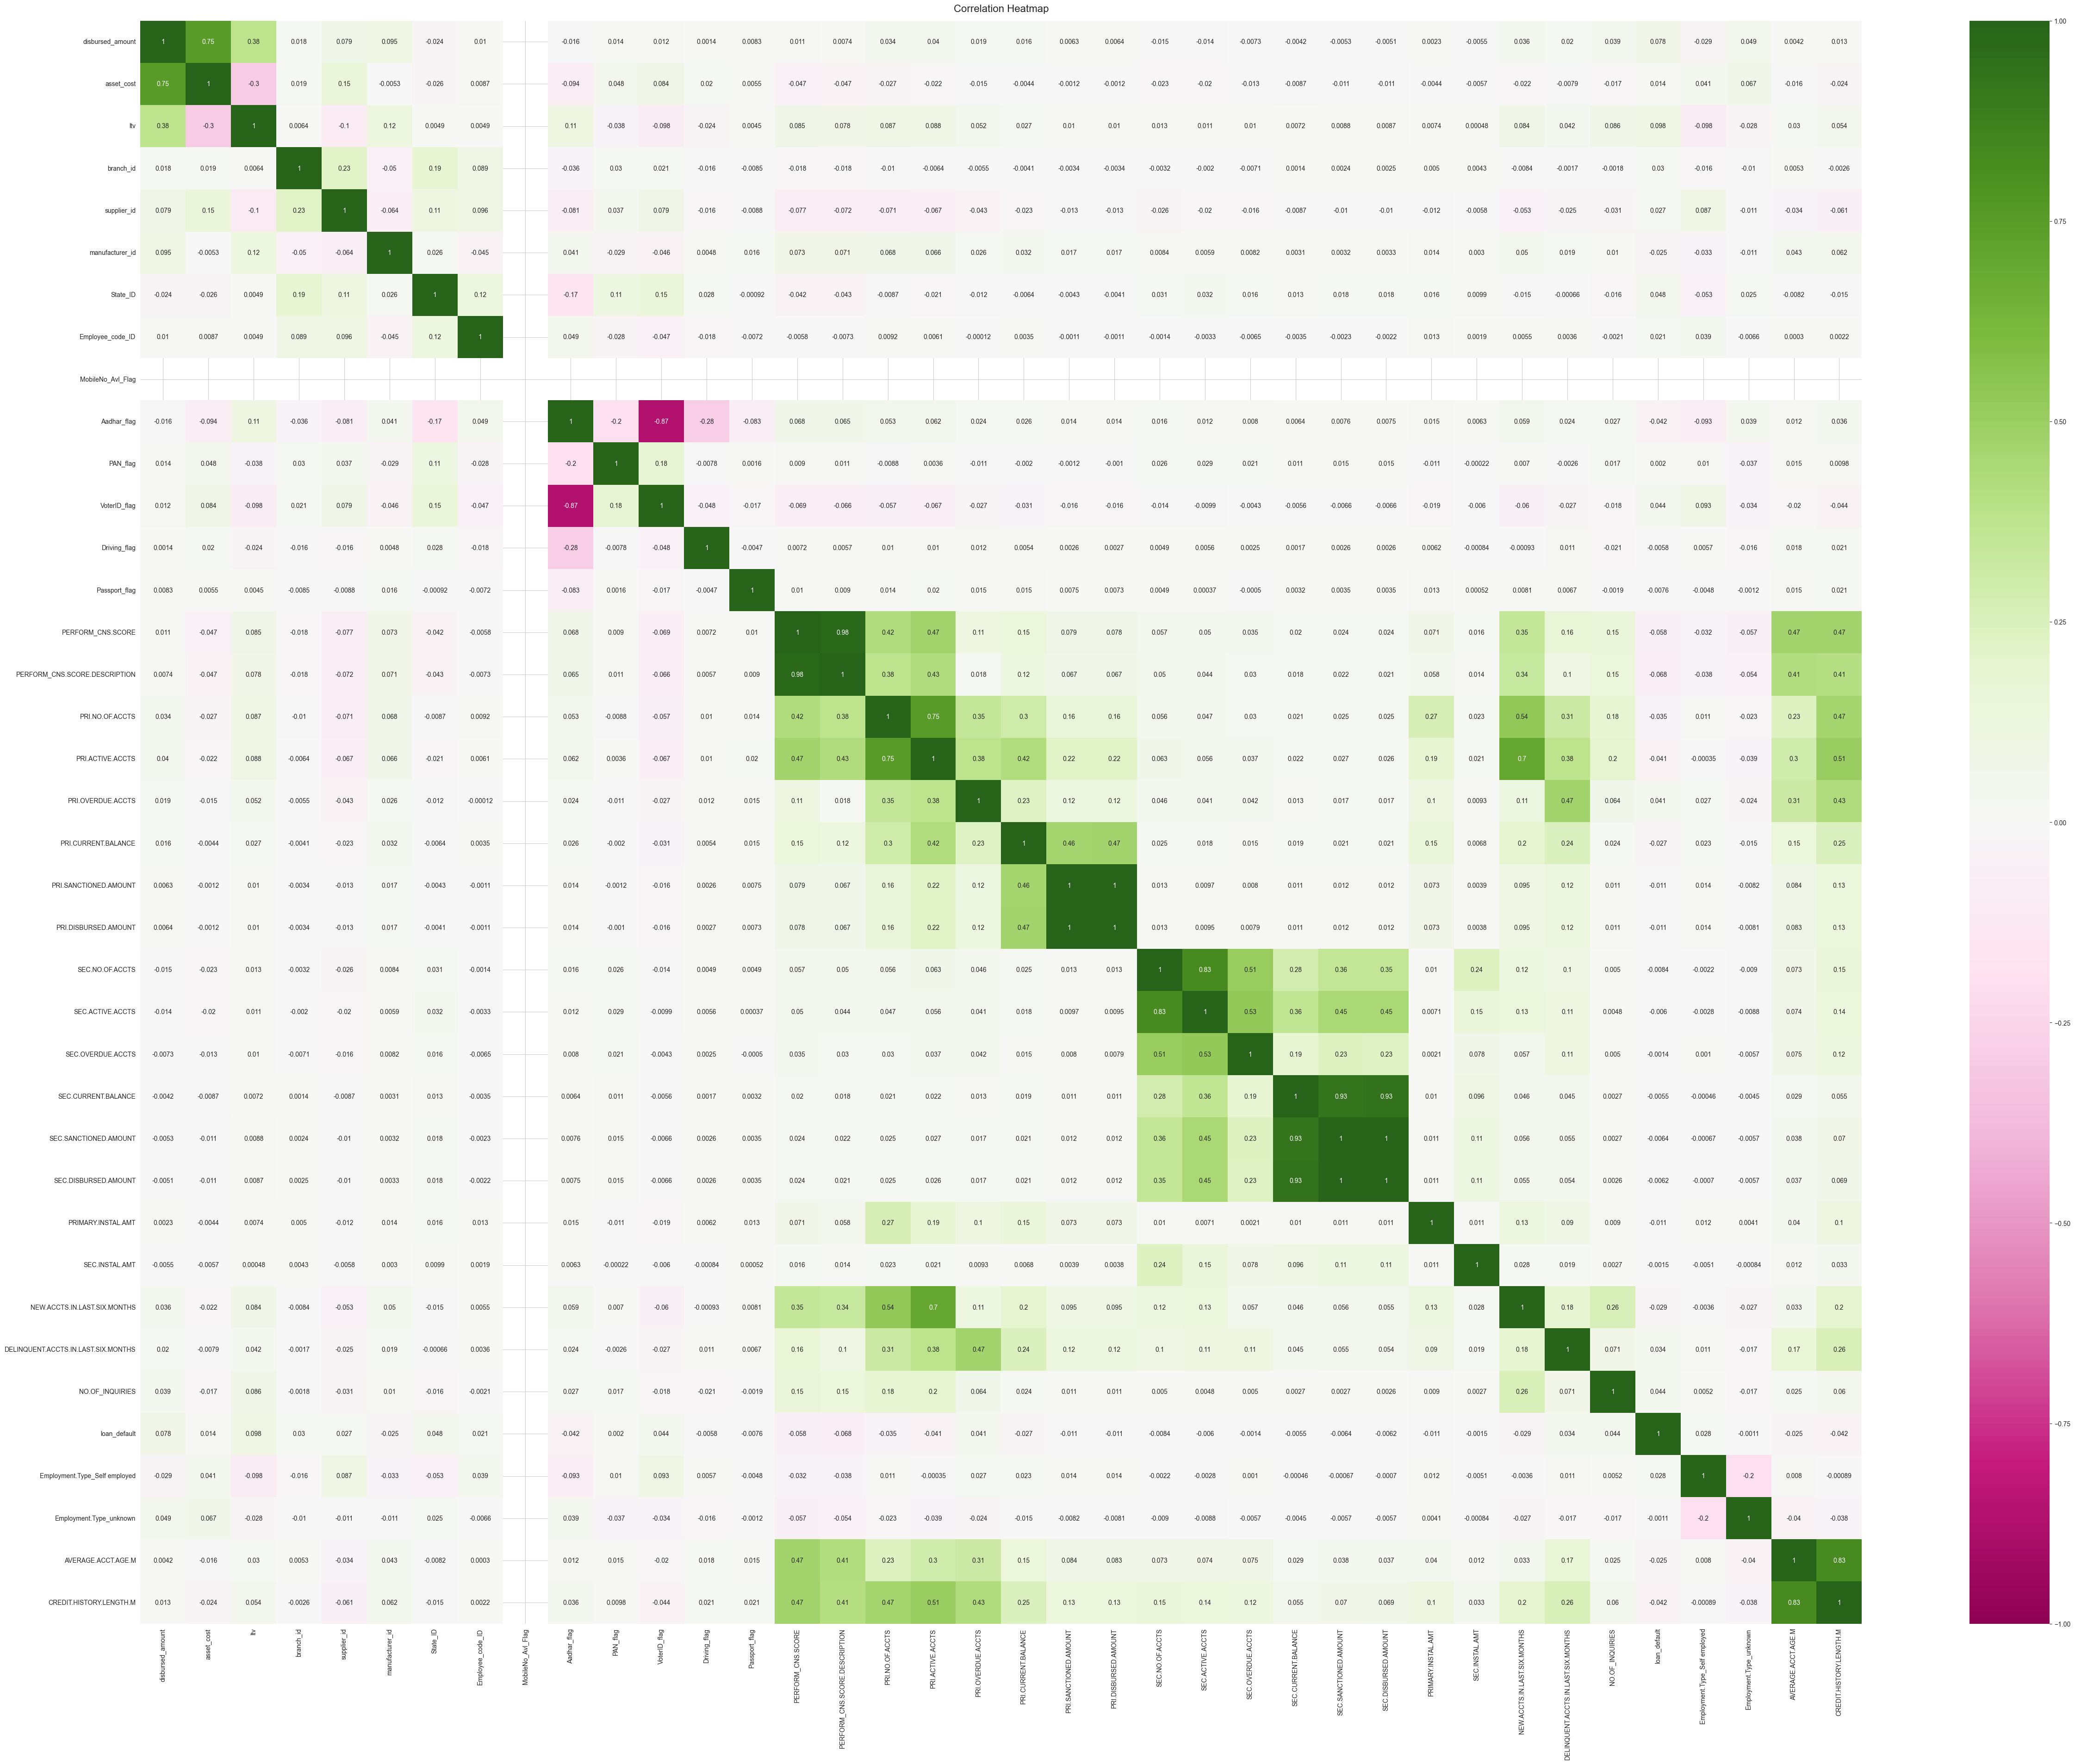

In [17]:

plt.figure(figsize=(60, 45))   # increases size of the heatmap
heatmap = sns.heatmap(DFd1.corr(), vmin=-1,cmap="PiYG", vmax=1, annot=True)  # sets names of the annotations as cor coefficients and annotates them and store the heatmap in variable for easier access
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14) 

From the correlation heatmap, we can conclude that none of the variables exhibit a linear relationship with the target variable. 'Disbursed_amount' and 'asset_cost' are highly correlated, which can be explained by their proportional relationship, as they are both parts of a single process. Instead of using both values, we can analyze the difference between them to study its relationship with the target variable.

In [18]:
DFd1['Paid_to_cost_diff'] = DFd1['asset_cost'] - DFd1['disbursed_amount']  # create a new column with the difference to remove the correlative component
DFd1.drop(['disbursed_amount', 'asset_cost'], axis=1, inplace=True)

print(DFd1.columns) #check

Index(['ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'Employment.Type_Self employed',
       'Employment.Type_unknown', 'AVERAGE.ACCT.AGE.M',
       'CREDIT.HISTORY.LENGTH.M', 'Paid_to_cost_diff'],
      dtype='object')


Additionally, from the Correlation Heatmap follows that pairs of variables

* 'PRI.NO.OF.ACCTS' and *'PRI.ACTIVE.ACCTS'*, 
* 'PRI.SANCTIONED.AMOUNT' and *'PRI.DISBURSED.AMOUNT'*, 
* 'SEC.NO.OF.ACCTS' and *'SEC.ACTIVE.ACCTS'*, 
* 'AVERAGE.ACCT.AGE.M' and *'CREDIT.HISTORY.LENGTH.M'*
* three variables 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT' and *'SEC.DISBURSED.AMOUNT'*
  
with correlation coefficients higher than 0.83 are approximately linearly correlated. To maintain a parsimonious model, we can drop one of the variables(to the left) from the group without a significant loss of information, while also reducing noise, as only one variable from the group carries new information.


The features of ID, such as 'branch_id', 'supplier_id', 'State_ID', 'Employee_code_ID', and 'manufacturer_id', Label + One-Hot Encoded and analyzed using the Mutual Information method. This method quantifies the relationship between two variables using mutual information, with higher values indicating greater dependency. It employs nonparametric techniques and estimates entropy from k-nearest neighbors distances. However, the analysis did not show significant values for the features. Although these features could potentially be researched to determine if they can indirectly affect the target variable as factors for other features, they have been dropped as the analysis exceeds the scope and primary aim of the project.

In [19]:
# From Mutual Information (one hot encoding for some of the variables was applied) analysis, zero information to target variable columns to be dropped

DFd1.drop(['branch_id', 'supplier_id','State_ID', 'Employee_code_ID','PERFORM_CNS.SCORE', 'manufacturer_id','PRI.NO.OF.ACCTS', 'PRI.SANCTIONED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT' ], axis=1, inplace=True)

In [20]:
DFd1.shape  # remaining features shape

(233154, 26)


An additional heatmap can be utilized to evaluate the dataset's appropriateness for the model. It demonstrates no substantial collinearity.

Text(0.5, 1.0, 'Correlation Heatmap')

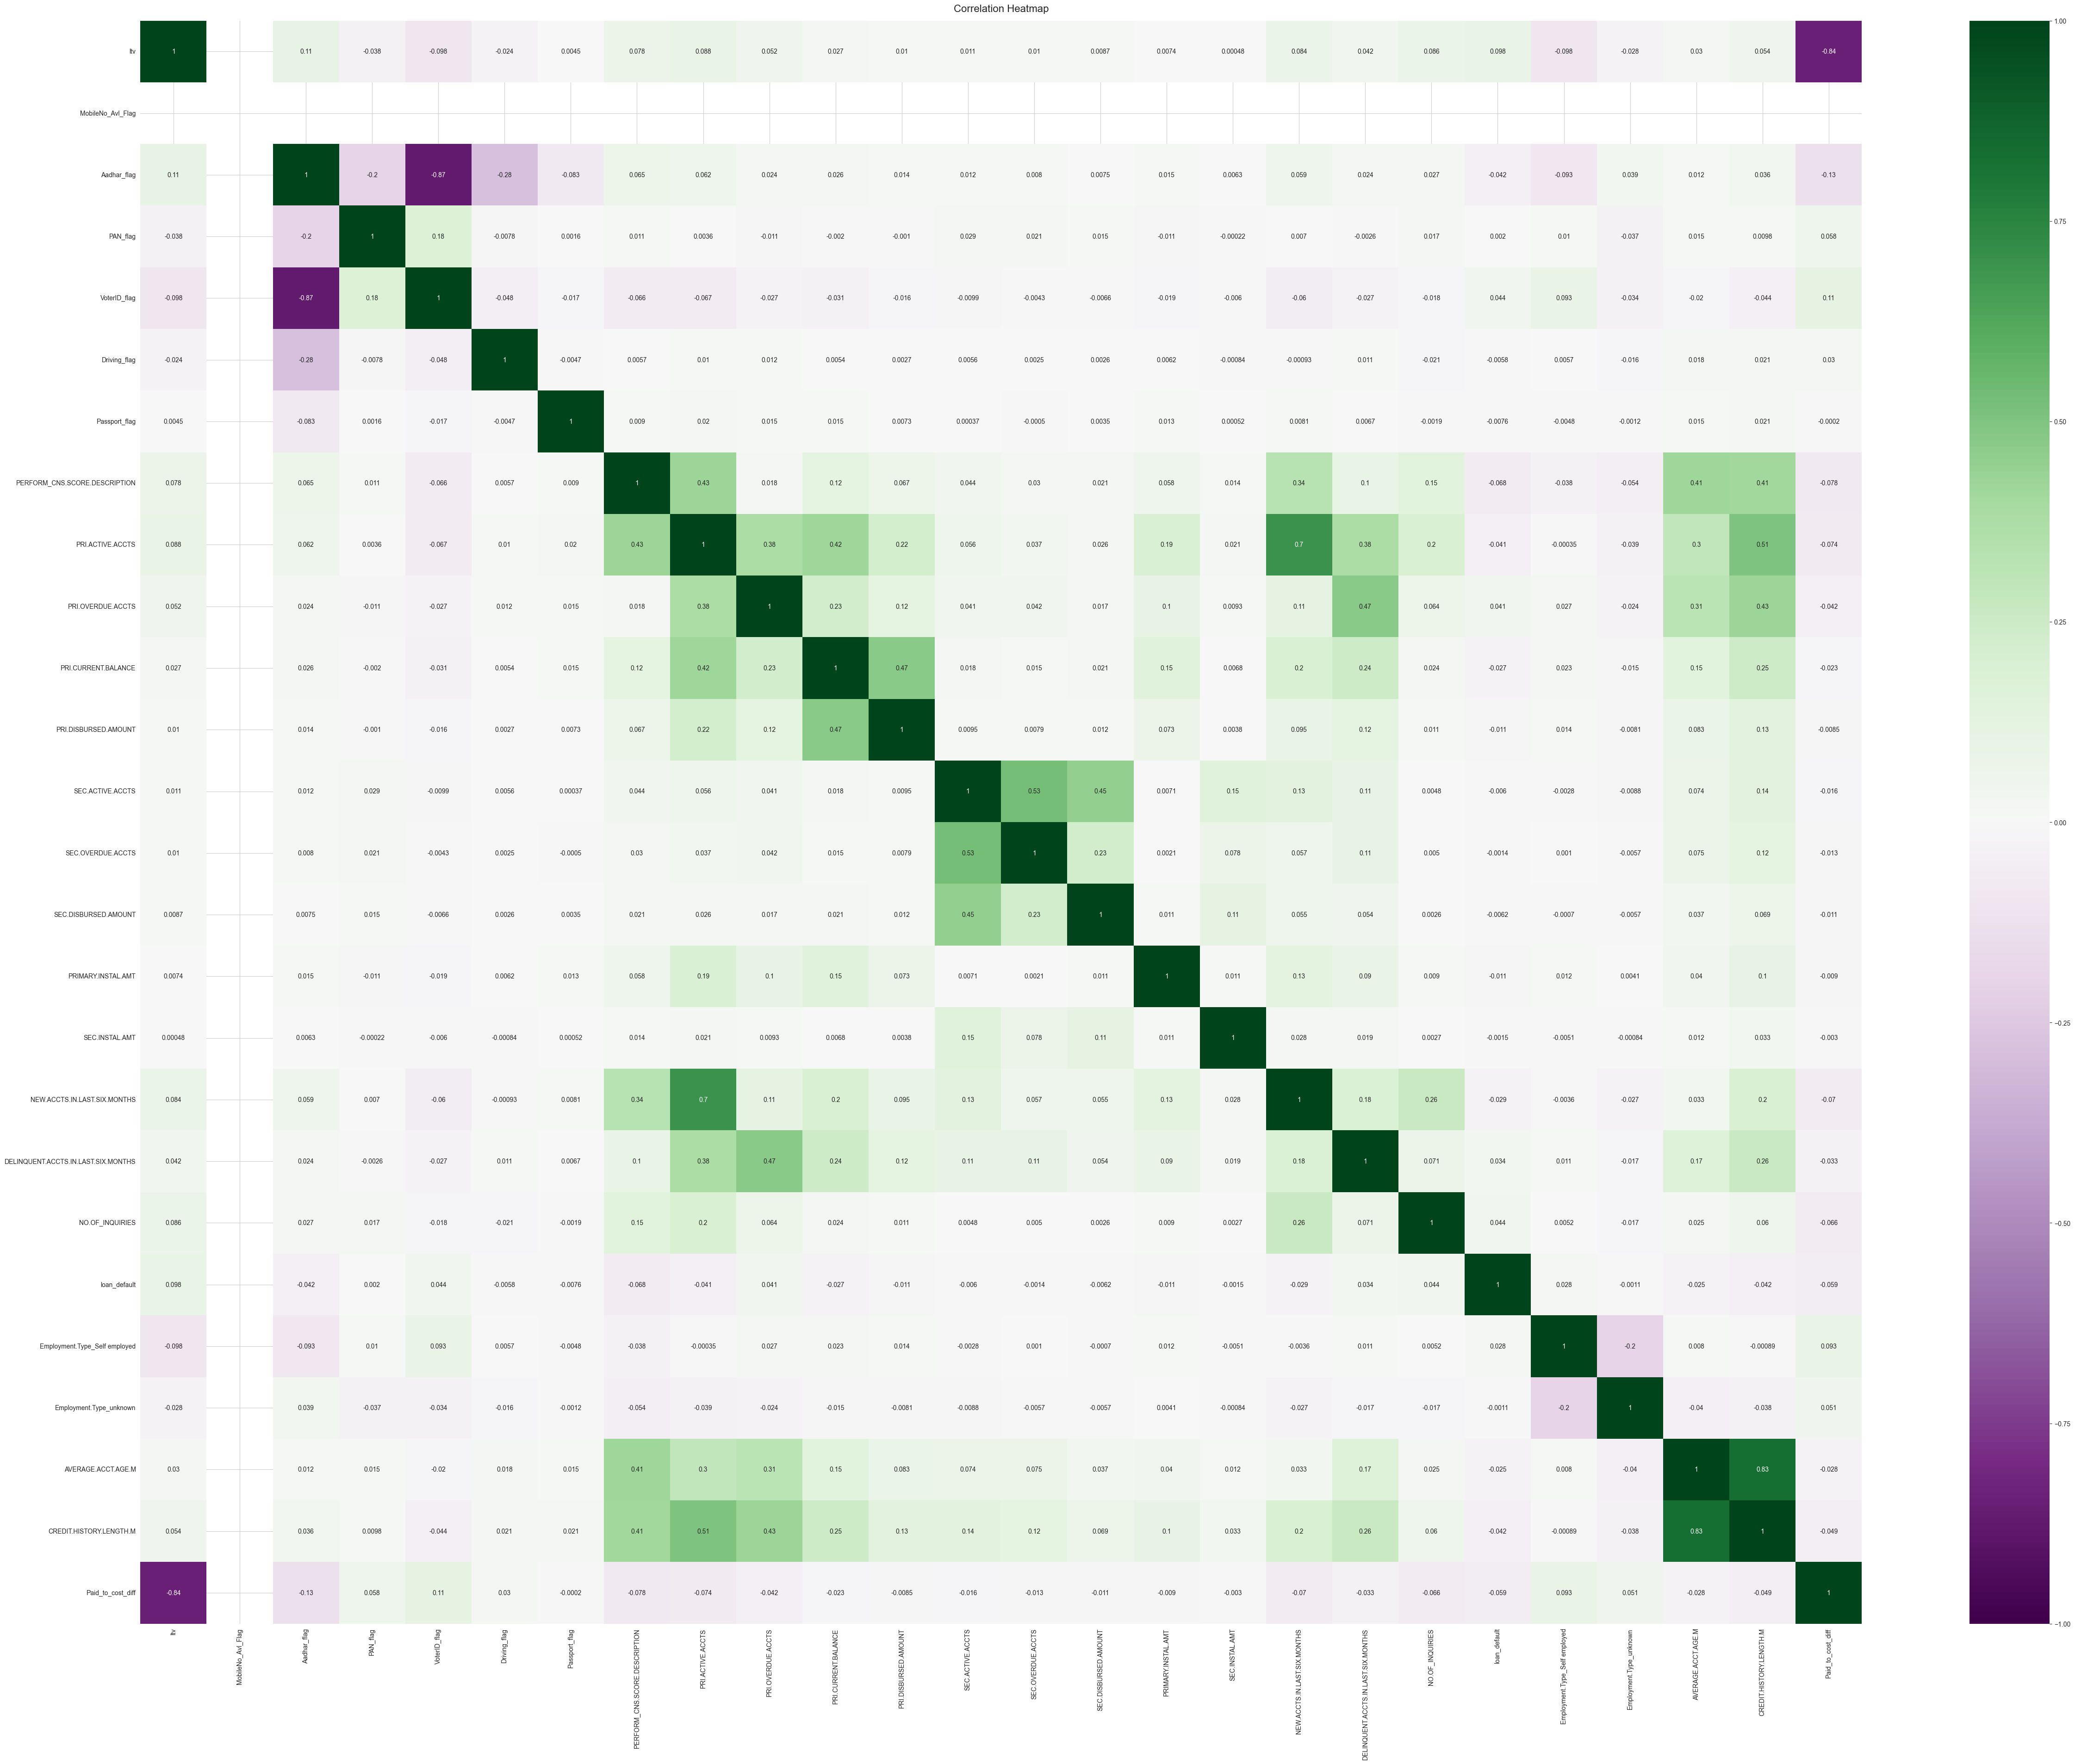

In [21]:
plt.figure(figsize=(60, 45))   # increases size of the heatmap
heatmap = sns.heatmap(DFd1.corr(), vmin=-1, vmax=1, cmap="PRGn", annot=True)  # sets names of the annotations as cor coefficients and annotates them and store the heatmap in variable for easier access
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14) 

Next step is to examine numerical variables

In [22]:
DFd1.describe()  #use describe method to find outliers among remaining numerical data

,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,AVERAGE.ACCT.AGE.M,CREDIT.HISTORY.LENGTH.M,Paid_to_cost_diff
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,74.746530,1.039896,0.156549,1.659001e+05,2.180659e+05,0.027703,0.007244,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,8.915764,16.252404,21508.074616
std,11.456636,1.941496,0.548787,9.422736e+05,2.377744e+06,0.316057,0.111079,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,15.106416,28.581255,12539.547453
min,10.030000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3997.000000
25%,68.880000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13086.000000
50%,76.800000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17987.000000
75%,83.670000,1.000000,0.000000,3.500650e+04,6.080000e+04,0.000000,0.000000,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,13.000000,24.000000,26606.000000
max,95.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,36.000000,8.000000,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,369.000000,468.000000,638420.000000


The highest value in the 'PRI.ACTIVE.ACCTS' column is 144 times greater than the third quartile, indicating a clear outlier. We should examine other outliers in the numerical features.

In [23]:
numeric_columns = ['ltv', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'CREDIT.HISTORY.LENGTH.M', 'Paid_to_cost_diff']

count  = 0
for  col in numeric_columns:
    Q1 = DFd1[col].quantile(0.25)
    Q3 = DFd1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = DFd1[(DFd1[col] < lower_bound) | (DFd1[col] > upper_bound)] 
    print("Column:", col, "Count of outliers:", len(outliers), "Outliers to Sample Ratio:", (len(outliers)/len(DFd1[col])), "Mean:", DFd1[col].mean(), "\nlower_bound:", lower_bound, "Min:", DFd1[col].min(), "upper_bound:", upper_bound, "Max:", DFd1[col].max(),  "\n" )

    if len(outliers) > 0:
        count += 1

print("Number of columns with outliers:", count)
print("Numeric columns", len(numeric_columns))   


Column: ltv Count of outliers: 6170 Outliers to Sample Ratio: 0.026463195999210824 Mean: 74.74653001878589 
lower_bound: 46.694999999999986 Min: 10.03 upper_bound: 105.85500000000002 Max: 95.0 

Column: PRI.ACTIVE.ACCTS Count of outliers: 32534 Outliers to Sample Ratio: 0.13953867400945297 Mean: 1.0398963775015655 
lower_bound: -1.5 Min: 0 upper_bound: 2.5 Max: 144 

Column: PRI.OVERDUE.ACCTS Count of outliers: 26275 Outliers to Sample Ratio: 0.11269375605822761 Mean: 0.15654889043293274 
lower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 25 

Column: PRI.CURRENT.BALANCE Count of outliers: 41044 Outliers to Sample Ratio: 0.17603815503915868 Mean: 165900.07693627386 
lower_bound: -52509.75 Min: -6678296 upper_bound: 87516.25 Max: 96524920 

Column: PRI.DISBURSED.AMOUNT Count of outliers: 39712 Outliers to Sample Ratio: 0.1703251927910308 Mean: 218065.89865496624 
lower_bound: -91200.0 Min: 0 upper_bound: 152000.0 Max: 1000000000 

Column: SEC.ACTIVE.ACCTS Count of outliers: 3817 Outliers to 

After conducting a comprehensive examination, certain outliers and the columns with the least amount of information were eliminated in order to create the most accurate model. All calculations are accessible on the Jypiter Notebook that was used for the analysis.

In [24]:
# apply the operation to obtain filtered dataframe, dropped about 2 200 rows, or 1%
DFd1_filt = DFd1.drop(["SEC.ACTIVE.ACCTS", "SEC.OVERDUE.ACCTS", "SEC.DISBURSED.AMOUNT", "SEC.INSTAL.AMT"], axis=1)\
    .loc[(DFd1["ltv"] >= 30) & (DFd1["PRI.ACTIVE.ACCTS"] <= 13) & (DFd1["PRI.CURRENT.BALANCE"] <= 6300000) &  (DFd1["PRI.DISBURSED.AMOUNT"] <= 7000000) & (DFd1["PRIMARY.INSTAL.AMT"] <= 900000)]\
    .reset_index(drop=True)
DFd1_filt.shape

(231046, 22)

### Hystograms and features scaling

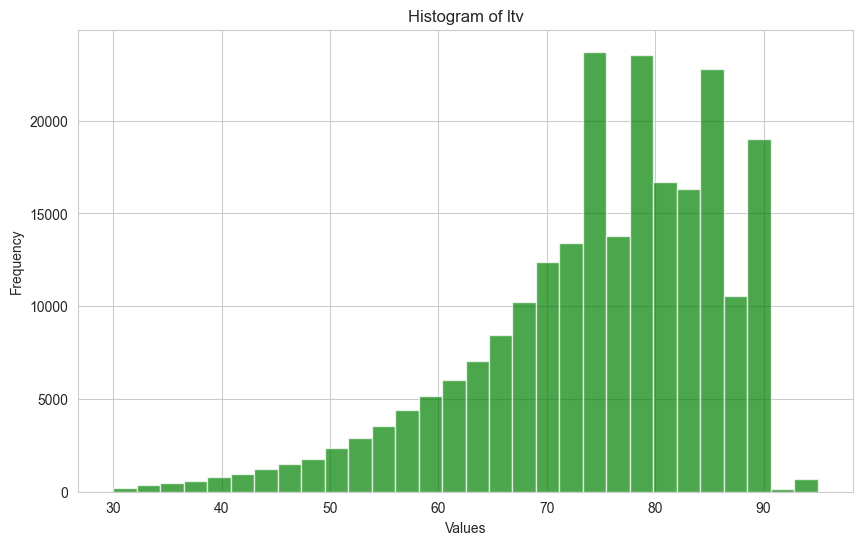

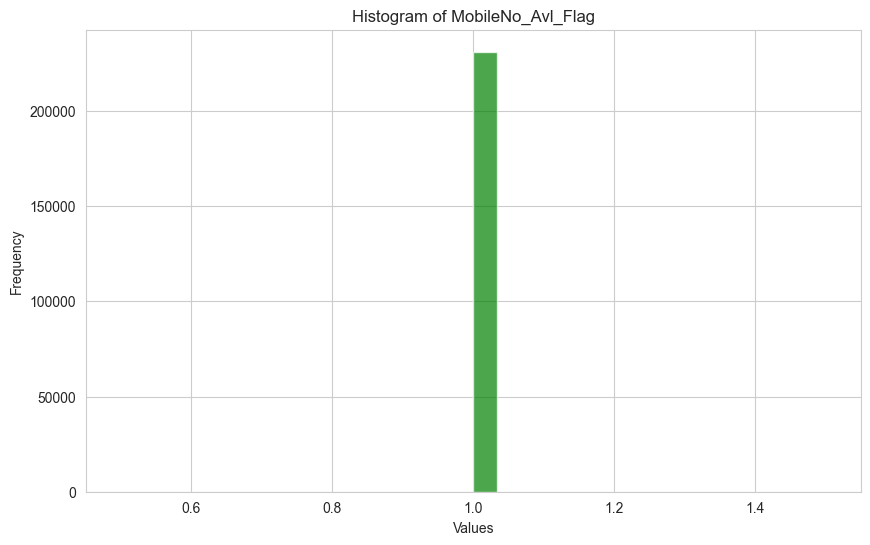

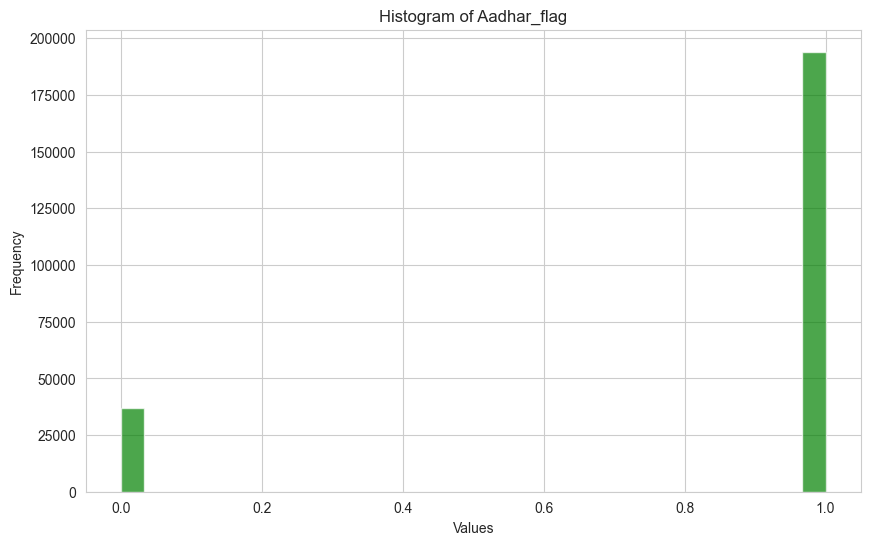

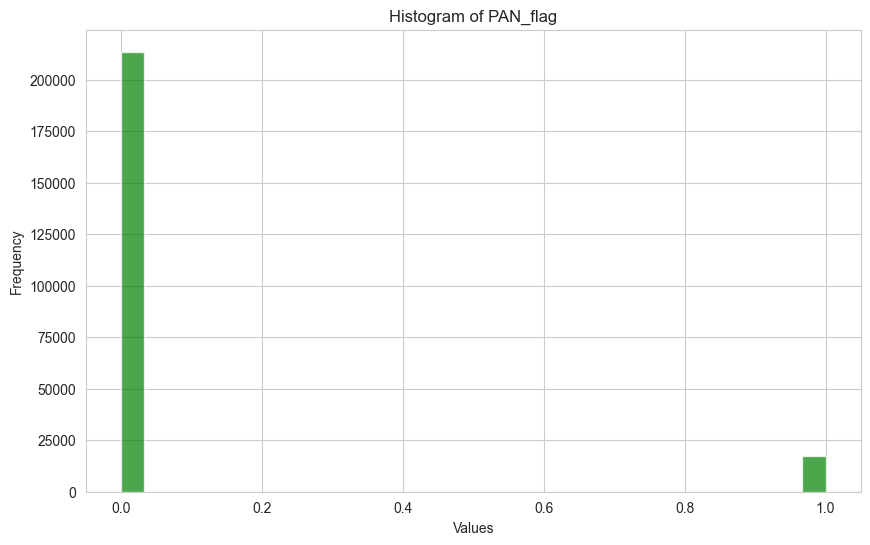

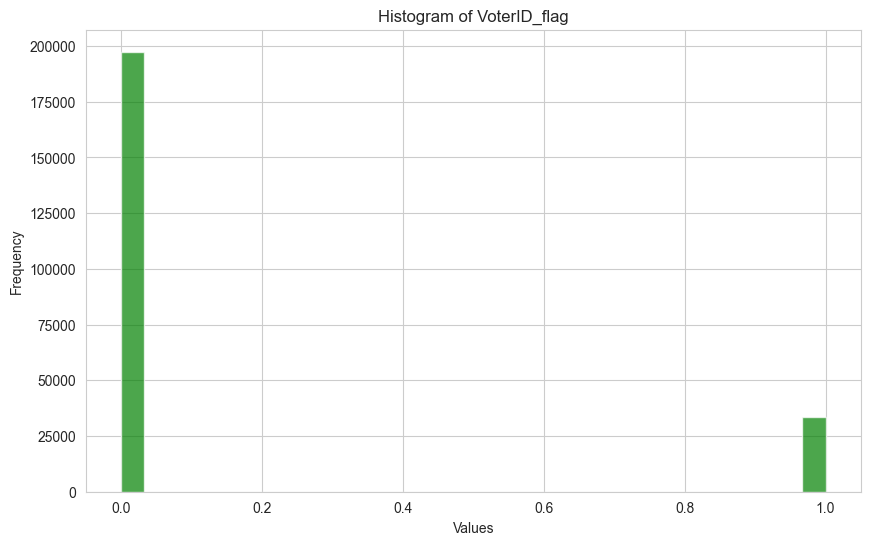

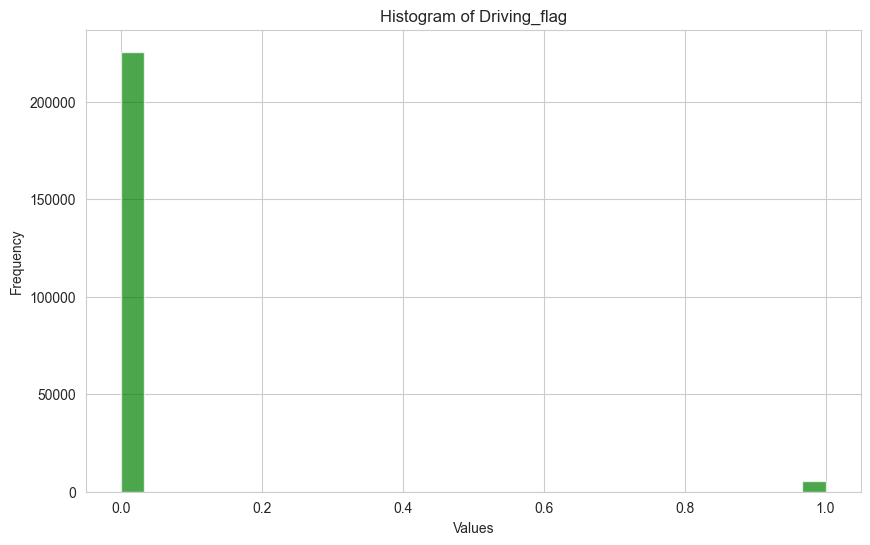

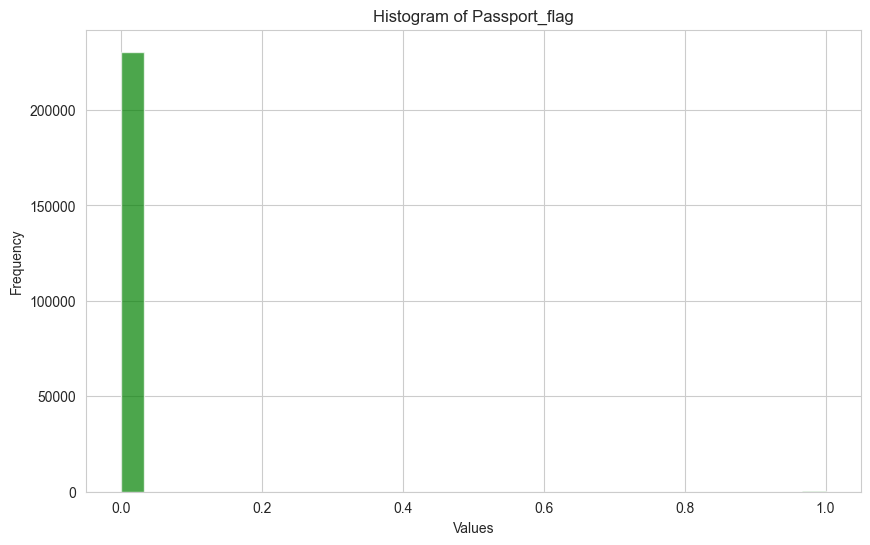

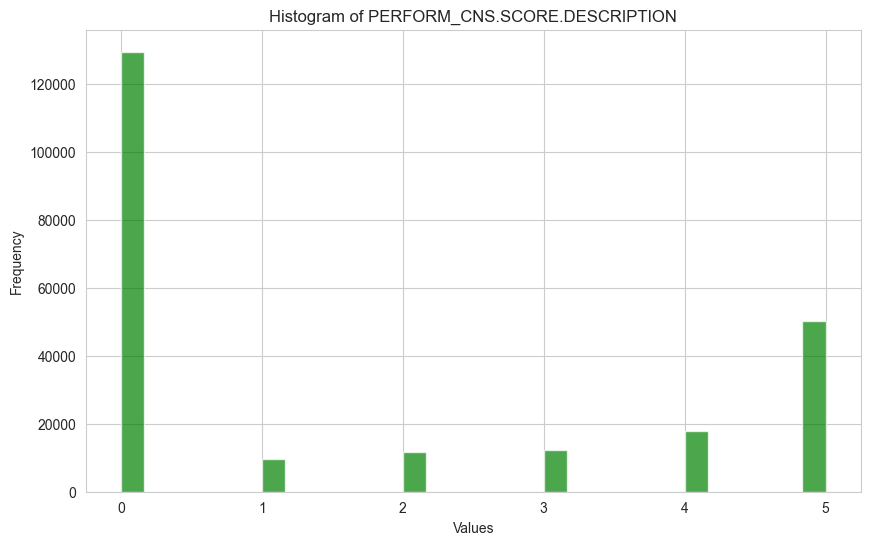

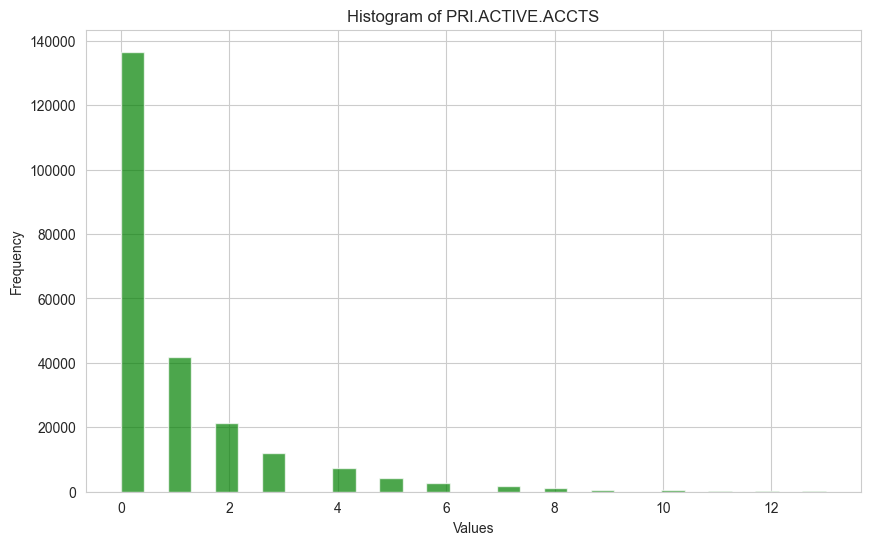

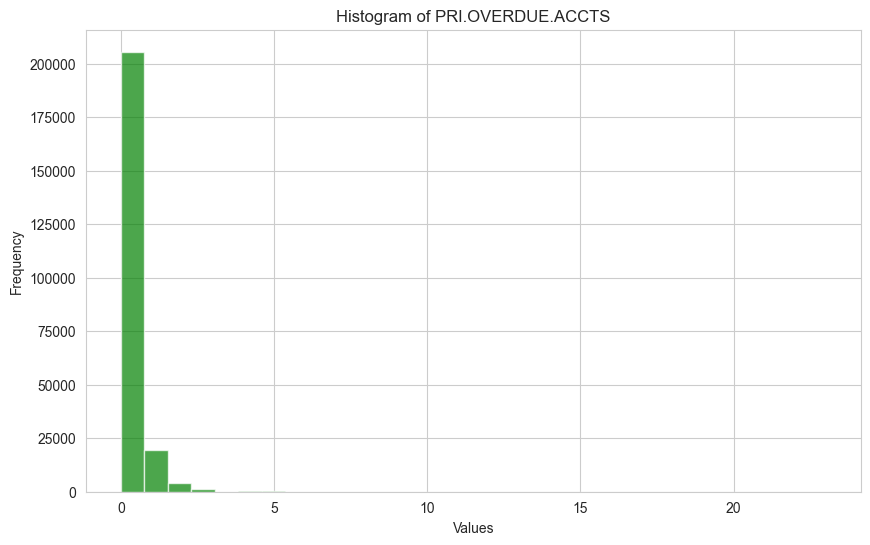

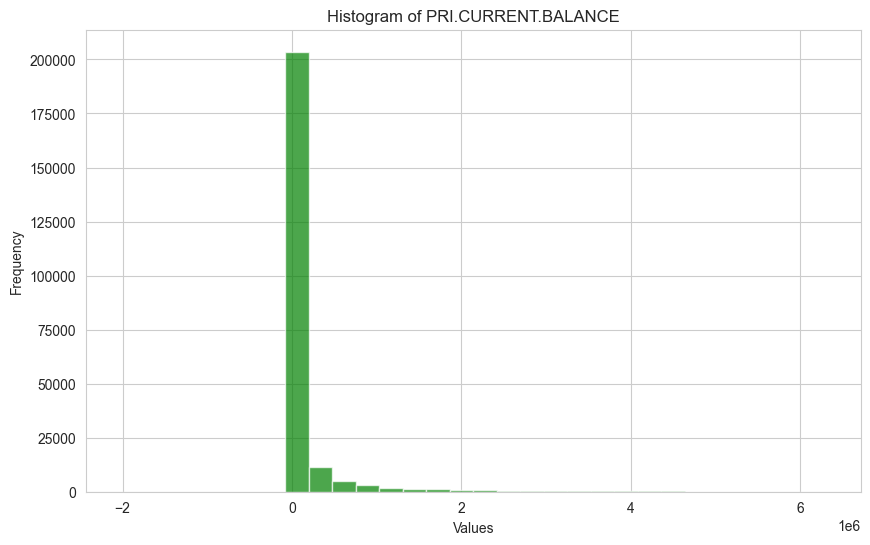

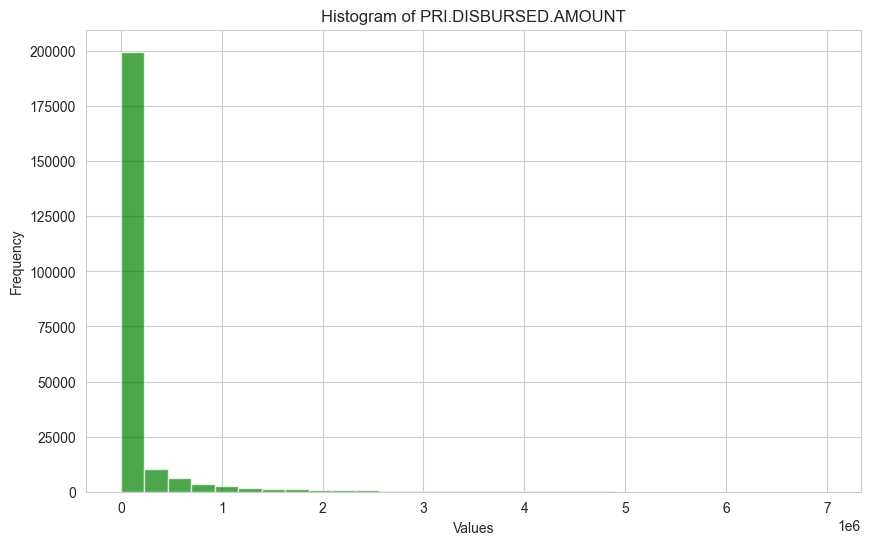

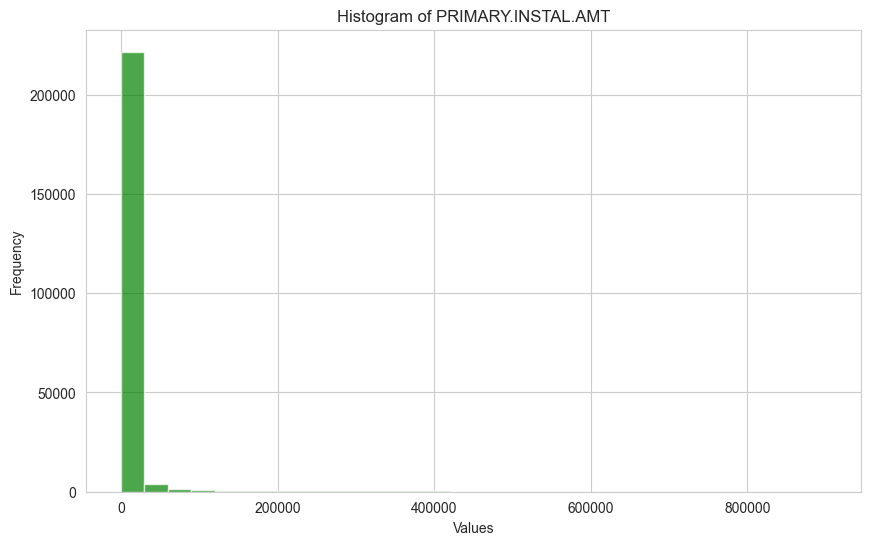

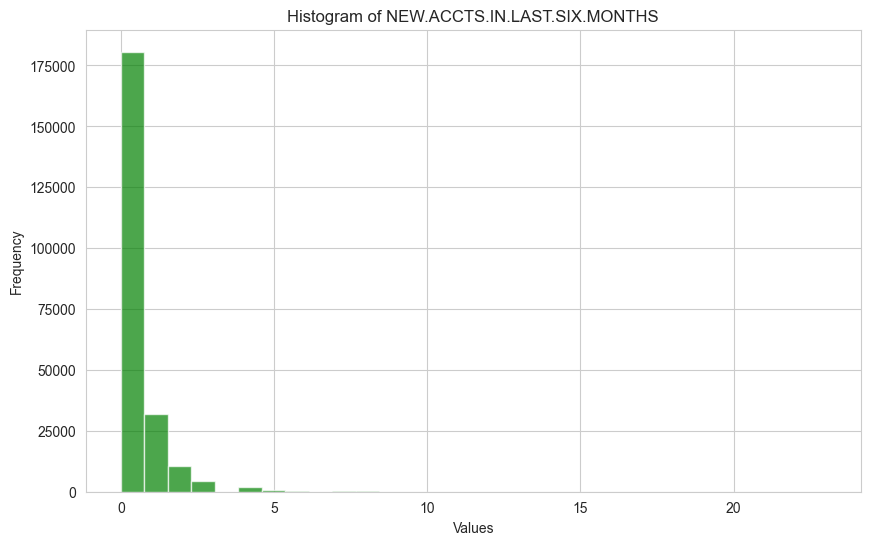

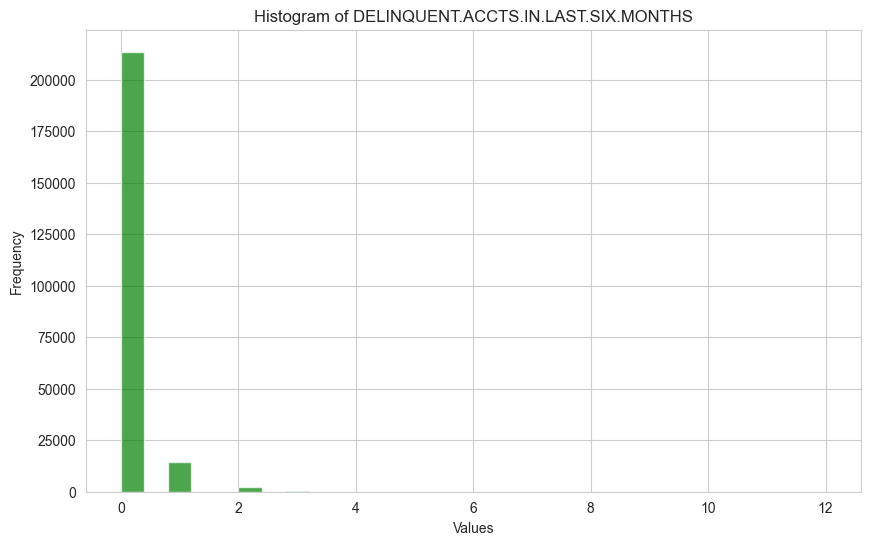

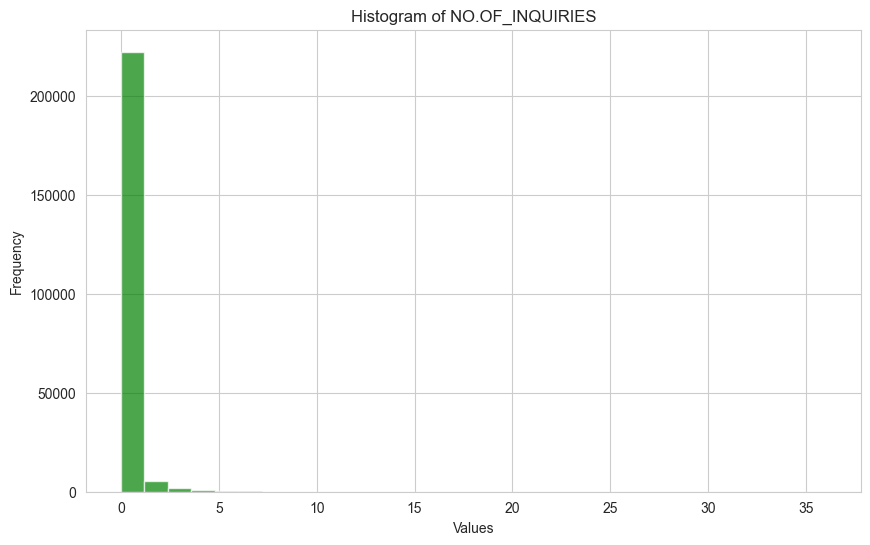

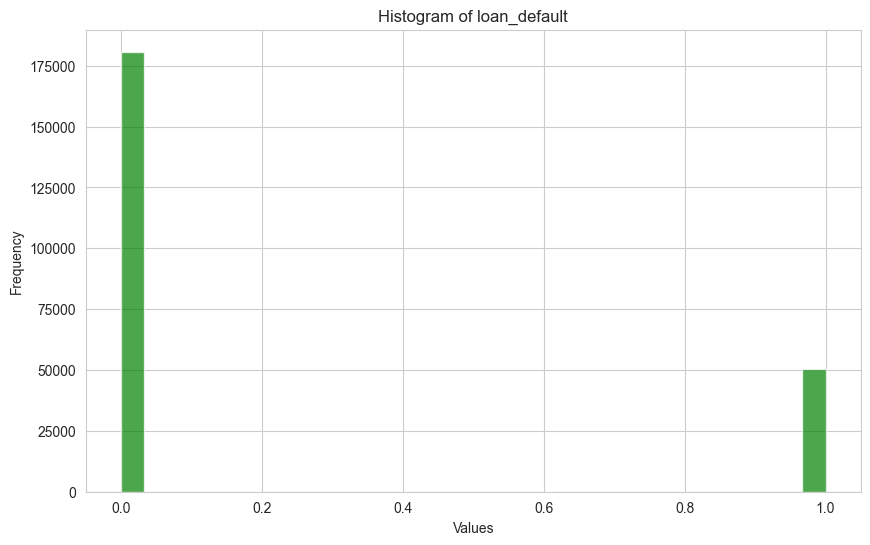

Error processing feature Employment.Type_Self employed: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
Error processing feature Employment.Type_unknown: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


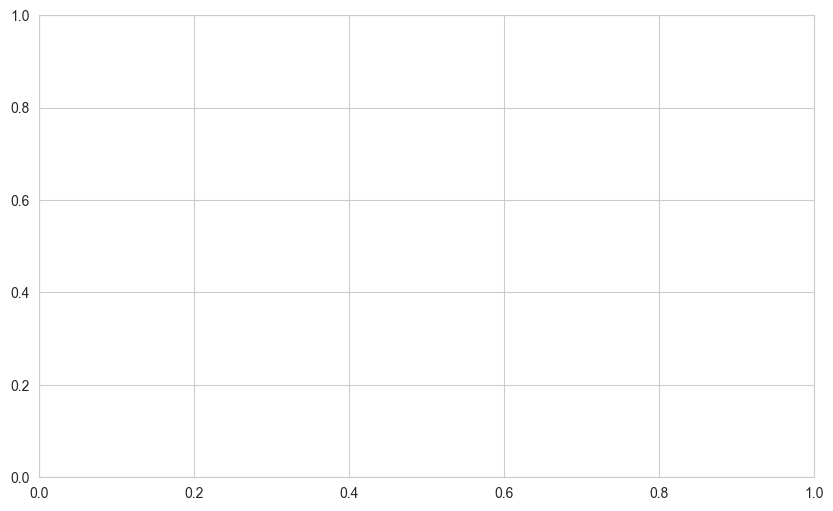

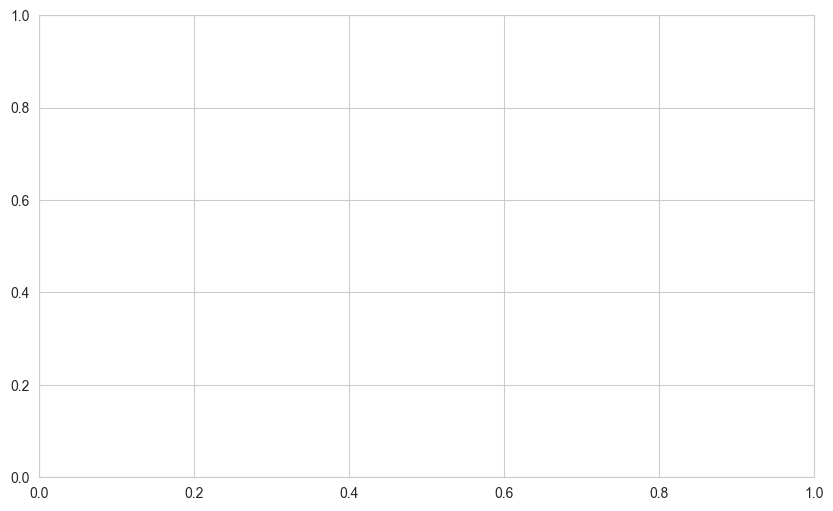

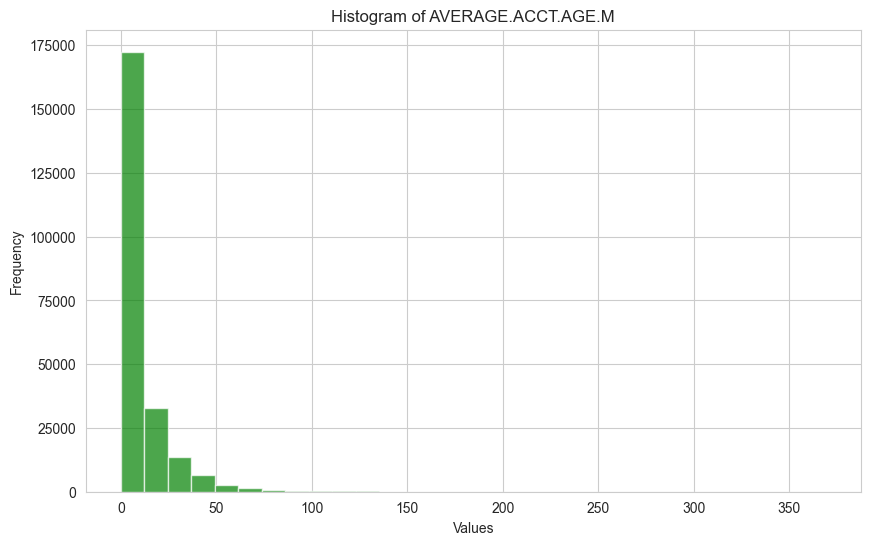

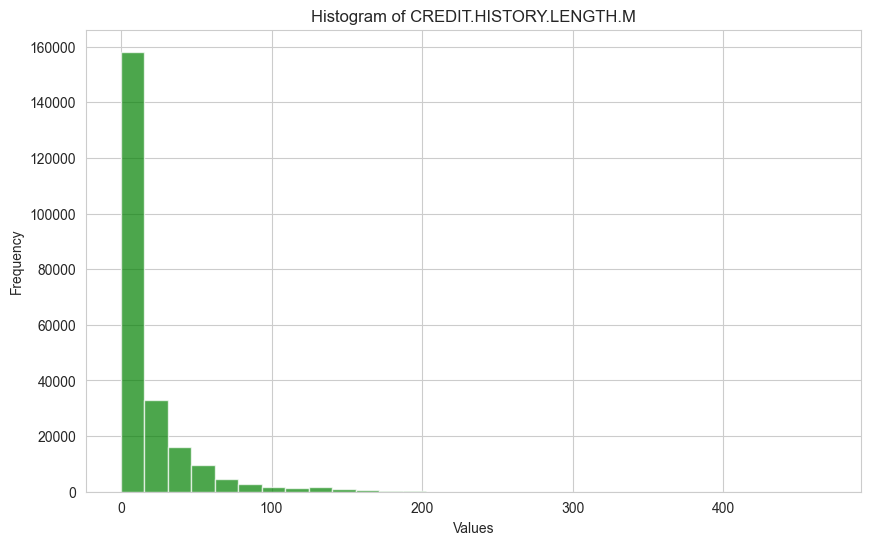

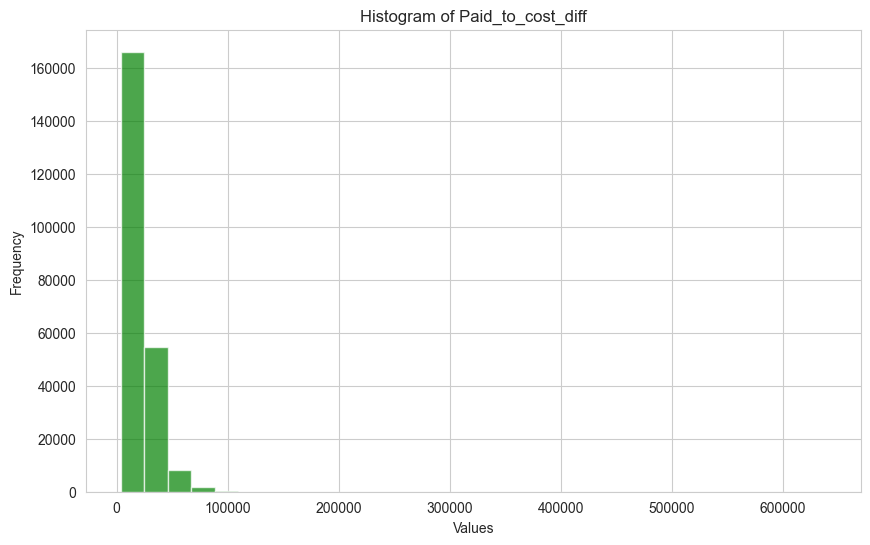

'# Create histograms for each feature\nfor feature in DFd1_filt.columns:\n    try:\n        print(f\'Starting plot for feature: {feature}\')\n        print(f\'First few rows of {feature}:\')\n        print(DFd1_filt[feature].head())\n        \n        plt.figure(figsize=(10, 6))\n        plt.hist(DFd1_filt[feature].dropna(), bins=30, alpha=0.7, color="green")\n        plt.xlabel(\'Values\')\n        plt.ylabel(\'Frequency\')\n        plt.title(f\'Histogram of {feature}\')\n        plt.show()\n        \n        print(f\'Completed plot for feature: {feature}\')\n    except Exception as e:\n        print(f\'Error processing feature {feature}: {e}\')'

In [25]:

# Create histograms for each feature
for feature in DFd1_filt.columns:
    try:
        plt.figure(figsize=(10, 6))
        plt.hist(DFd1_filt[feature].dropna(), bins=30, alpha=0.7, color="green")
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {feature}')
        plt.show()
    except Exception as e:
        print(f'Error processing feature {feature}: {e}')

'''# Create histograms for each feature
for feature in DFd1_filt.columns:
    try:
        print(f'Starting plot for feature: {feature}')
        print(f'First few rows of {feature}:')
        print(DFd1_filt[feature].head())
        
        plt.figure(figsize=(10, 6))
        plt.hist(DFd1_filt[feature].dropna(), bins=30, alpha=0.7, color="green")
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {feature}')
        plt.show()
        
        print(f'Completed plot for feature: {feature}')
    except Exception as e:
        print(f'Error processing feature {feature}: {e}')'''


To use Logistic Regression and SVM while avoiding bias, let's scale the numeric data and the categorical variable 'PERFORM_CNS.SCORE.DESCRIPTION' to improve accuracy. Although MinMaxScaler within the [0,1] range is typically applied to binary problem solutions, it has been found empirically that StandardScaler yields better results for this model fitting.

In [26]:
numcol_stand = ['ltv', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'CREDIT.HISTORY.LENGTH.M', 'Paid_to_cost_diff', 'AVERAGE.ACCT.AGE.M', 'PERFORM_CNS.SCORE.DESCRIPTION']

scaler = StandardScaler()

for col in numcol_stand:
    
   DFd1_filt[col] = scaler.fit_transform(DFd1_filt[col].values.reshape(-1,1))

Let's investigate the distribution of the target variable by examining a histogram

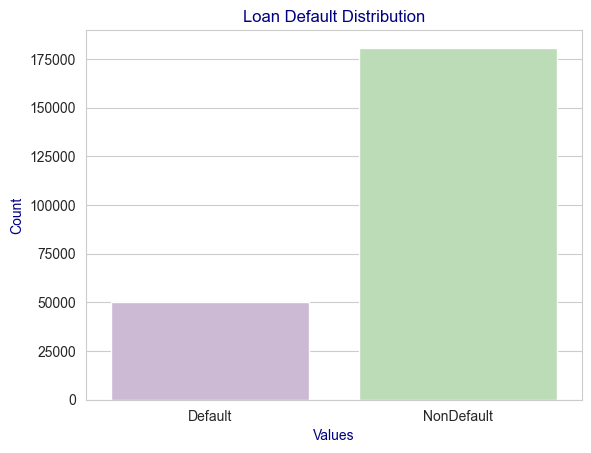

In [27]:
x = np.array(DFd1_filt['loan_default'])
# count the number of 1s and 0s in the array
ones_count = np.count_nonzero(x == 1)
zeros_count = np.count_nonzero(x == 0)

'''# create a bar chart
colors = ['red', 'green']
plt.bar(['Default', 'NonDefault'], [ones_count, zeros_count], color=colors)
plt.xlabel('Values', color = 'navy')
plt.ylabel('Count', color = 'navy')
plt.title('Loan Defaut distribution', color = 'navy')
plt.show()

 x = np.array(DFd1_filt['loan_default'])

# Count the number of 1s and 0s in the array
ones_count = np.count_nonzero(x == 1)
zeros_count = np.count_nonzero(x == 0)'''

# Create a DataFrame to hold the data
data = pd.DataFrame({'Values': ['Default', 'NonDefault'],
                     'Count': [ones_count, zeros_count]})

# Create a color palette from the "PiYG" colormap
piyg_palette = sns.color_palette("PRGn", n_colors=2)

# Create a bar plot using Seaborn and the piyg_palette
sns.barplot(data=data, x='Values', y='Count', palette=piyg_palette)

plt.xlabel('Values', color='navy')
plt.ylabel('Count', color='navy')
plt.title('Loan Default Distribution', color='navy')
plt.show()

The graph show that the distribution of default and nondefault values is univen. To avoid bias caused by an imbalanced distribution, we can utilize techniques like oversampling the minority class or undersampling the majority class to balance the dataset. This is because Logistic Regression and Support Vector Machine algorithms are not robust to imbalanced distributions. Oversampling involves duplicating samples from the minority class at random to enhance its representation in the dataset. This can be achieved using methods such as random oversampling, Synthetic Minority Over-sampling Technique (SMOTE), or ADASYN(Adaptive Synthetic Sampling).

It is important to note that while SMOTE may have a higher accuracy score on this particular dataset, ADASYN may be more effective in other scenarios with different datasets. It is always important to experiment with different techniques and evaluate their effectiveness on the specific problem at hand. Additionally, it is crucial to assess the impact of data augmentation on the overall performance of the model and avoid overfitting.

As the dataset contains a mixture of categorical and numerical data, the SMOTENC version of the SMOTE method should be used. However, due to technical limitations, we will use SMOTE instead. To apply SMOTE for a mixed dataset, we will first transform all categorical variables to integers. Secondly, we will apply SMOTE, and finally, we will round all the synthetic sample categorical variables to integers.

In [28]:
for col in DFd1_filt.columns:
    if DFd1_filt[col].dtype == 'category' or DFd1_filt[col].dtype == 'uint8':
        DFd1_filt[col] = DFd1_filt[col].astype('int64')
DFd1_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231046 entries, 0 to 231045
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ltv                                  231046 non-null  float64
 1   MobileNo_Avl_Flag                    231046 non-null  int64  
 2   Aadhar_flag                          231046 non-null  int64  
 3   PAN_flag                             231046 non-null  int64  
 4   VoterID_flag                         231046 non-null  int64  
 5   Driving_flag                         231046 non-null  int64  
 6   Passport_flag                        231046 non-null  int64  
 7   PERFORM_CNS.SCORE.DESCRIPTION        231046 non-null  float64
 8   PRI.ACTIVE.ACCTS                     231046 non-null  float64
 9   PRI.OVERDUE.ACCTS                    231046 non-null  float64
 10  PRI.CURRENT.BALANCE                  231046 non-null  float64
 11  PRI.DISBURSED

### Sampling application and splits

In [29]:
# Separetes the features matrix from target variable
X = DFd1_filt.drop('loan_default', axis=1)
y = DFd1_filt['loan_default']

smote = SMOTE()    # the sampling method implementation
X_resampled, y_resampled = smote.fit_resample(X, y)

# round categorical variables
X_resampled[['VoterID_flag','MobileNo_Avl_Flag', 'Driving_flag', 'Aadhar_flag', 'Employment.Type_Self employed', 'PAN_flag', 'Employment.Type_unknown', 'Passport_flag']] = np.round(X_resampled[['VoterID_flag',  'MobileNo_Avl_Flag', 'Driving_flag', 'Aadhar_flag', 'Employment.Type_Self employed', 'PAN_flag','Employment.Type_unknown', 'Passport_flag']])


y_resampled = np.round(y_resampled)

Following the preprocessing of the dataset, it is now appropriate to partition it into training and testing sets for the purpose of fitting a logistic regression model. Given the existence of outliers within the data, it may prove advantageous to undertake feature selection and hyperparameter tuning. This can be achieved through the division of our training set into distinct training and validation subsets.

In [30]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Split train and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=42)


The model is prepared to be used in Machine Learning and there are three suggested algorithms - Logistic Regression, Support Vector Machines, and Extreme Gradient Boost - that will be compared for their effectiveness.

_________________
### Logistic Regression: theory
__________________

***Logistic Regression Loss Function Derivation and Gradient Descent***

**Logistic Regression Model**

In logistic regression, the predicted probability $\hat{y}_i$ that a given input $\mathbf{x}_i$ belongs to the positive class (class 1) is given by the sigmoid function applied to the linear predictor $z_i$:

$$
\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
$$

where:
- $z_i = \mathbf{w} \cdot \mathbf{x}_i + b$
- $\mathbf{w}$ is the vector of weights (coefficients).
- $b$ is the bias term (intercept).

**Log-Loss (Binary Cross-Entropy Loss)**

The log-loss (or binary cross-entropy loss) function measures the performance of a classification model whose output is a probability value between 0 and 1. For logistic regression, the log-loss for a single training sample $(\mathbf{x}_i, y_i)$ is defined as:

$$
\ell_i = - \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

The total log-loss for all training samples is the average log-loss over all samples:

$$
\text{Log-Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where $N$ is the number of training samples.

**Gradient Descent**

To minimize the log-loss, we use gradient descent, which involves computing the gradients of the log-loss with respect to the model parameters (weights and bias) and updating the parameters iteratively.

***Gradient with Respect to Weights*** ($\mathbf{w}$)

1. **Predicted Probability**:

$$
\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
$$

2. **Log-Loss for a Single Sample**:

$$
\ell_i = - \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

3. **Chain Rule Application**:

$$
\frac{\partial \ell_i}{\partial \mathbf{w}} = \frac{\partial \ell_i}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial z_i} \cdot \frac{\partial z_i}{\partial \mathbf{w}}
$$

4. **Derivative of Log-Loss with Respect to $\hat{y}_i$**:

$$
\frac{\partial \ell_i}{\partial \hat{y}_i} = - \left( \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right)
$$

5. **Derivative of $\hat{y}_i$ with Respect to $z_i$**:

We know that: 
$$
\hat{y} = \frac{1}{1 + e^{-z}} \quad \text{and} \quad 1 - \hat{y} = \frac{e^{-z}}{1 + e^{-z}}
$$

Therefore,

$$
\frac{d\hat{y}}{dz} = \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} = \hat{y} \cdot (1 - \hat{y})
$$


$$
\frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i (1 - \hat{y}_i)
$$

6. **Derivative of $z_i$ with Respect to $\mathbf{w}$**:

$$
z_i = \mathbf{w} \cdot \mathbf{x}_i + b \implies \frac{\partial z_i}{\partial \mathbf{w}} = \mathbf{x}_i
$$

7. **Combining the Derivatives**:

$$
\frac{\partial \ell_i}{\partial \mathbf{w}} = \left( \hat{y}_i - y_i \right) \mathbf{x}_i
$$

8. **Gradient for All Samples**:

$$
\frac{\partial \text{Log-Loss}}{\partial \mathbf{w}} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i) \mathbf{x}_i
$$

***Gradient with Respect to Bias ($b$)***

1. **Derivative of $z_i$ with Respect to $b$**:

$$
z_i = \mathbf{w} \cdot \mathbf{x}_i + b \implies \frac{\partial z_i}{\partial b} = 1
$$

2. **Combining the Derivatives**:

$$
\frac{\partial \ell_i}{\partial b} = \left( \hat{y}_i - y_i \right) \cdot 1 = \hat{y}_i - y_i
$$

3. **Gradient for All Samples**:

$$
\frac{\partial \text{Log-Loss}}{\partial b} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i)
$$

***Summary of Gradients***

- **Gradient with respect to weights ($\mathbf{w}$)**:

$$
\frac{\partial \text{Log-Loss}}{\partial \mathbf{w}} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i) \mathbf{x}_i
$$

- **Gradient with respect to bias ($b$)**:

$$
\frac{\partial \text{Log-Loss}}{\partial b} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i)
$$

These gradients are used in gradient descent to update the model parameters ($\mathbf{w}$ and $b$) iteratively to minimize the log-loss function.
________________


### Logistic regression implementation

In [31]:
'''from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
log_reg_er_search_grid= LogisticRegression(solver='saga', max_iter=1000, tol=1e-4)

# Define the parameter grid for grid search
param_grid = {
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Only relevant for elasticnet
}

# Create the GridSearchCV object
grid_search = GridSearchCV(log_reg_er_search_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)'''


'from sklearn.model_selection import GridSearchCV\n\n# Define the logistic regression model\nlog_reg_er_search_grid= LogisticRegression(solver=\'saga\', max_iter=1000, tol=1e-4)\n\n# Define the parameter grid for grid search\nparam_grid = {\n    \'penalty\': [\'none\', \'l1\', \'l2\', \'elasticnet\'],\n    \'C\': [0.01, 0.1, 1, 10, 100],\n    \'l1_ratio\': [0, 0.25, 0.5, 0.75, 1]  # Only relevant for elasticnet\n}\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(log_reg_er_search_grid, param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1, verbose=1)\n\n# Perform grid search\ngrid_search.fit(X_train, y_train)\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n\n# Print the best parameters\nprint("Best parameters found: ", grid_search.best_params_)'

In [32]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(penalty=None,solver = "sag")

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(penalty=None, solver='sag')

In [33]:
# predictions and quick metrics for logistic regression for features selection
log_reg_pred = log_reg.predict(X_val) 
score = log_reg.score(X_val, y_val)
print('log_reg score:', score)

log_reg score: 0.5932555826778773


In [34]:
log_reg_predT = log_reg.predict(X_test) # predictions for the best model test set

print("Accuracy of logistic regression model ",accuracy_score(y_test, log_reg_predT))
print("F1 Score ",f1_score(y_test, log_reg_predT))
print("Recall Score ",recall_score(y_test, log_reg_predT))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, log_reg_predT))

print(confusion_matrix(y_test, log_reg_predT))
auc_score_LR = roc_auc_score(y_test, log_reg_predT)
print("AUC score:", auc_score_LR)

Accuracy of logistic regression model  0.5929177425304316
F1 Score  0.6127447540178258
Recall Score  0.6459273507435082
Balanced Accuracy Score  0.5930659338871664
[[14686 12500]
 [ 9572 17462]]
AUC score: 0.5930659338871664


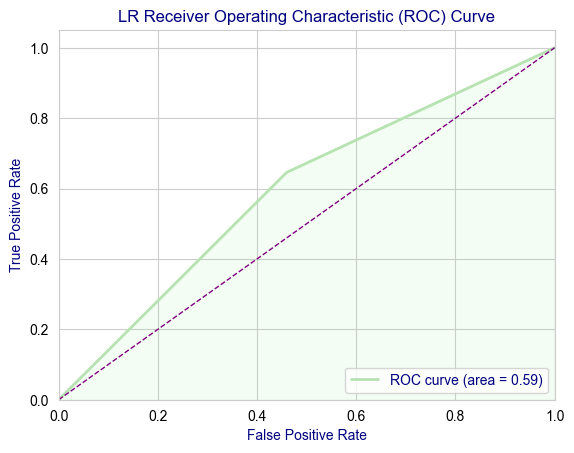

In [35]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, log_reg_predT)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(facecolor='white')
plt.plot(fpr, tpr, color=piyg_palette[1], lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'navy')
plt.ylabel('True Positive Rate', color = 'navy')
plt.tick_params(colors='black')
plt.title('LR Receiver Operating Characteristic (ROC) Curve', color = 'navy')
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.1)
leg = plt.legend(loc="lower right")
leg.get_texts()[0].set_color('navy')
plt.show()

Regularised logistic regression yielded the best results at C = 0.007, with an AUC score of 0.5945125946367751. This score was slightly lower than that obtained using ordinary logistic regression (detailed results are available in the working notebook).

### Regularization and Search Grid


______________

Regularization techniques are used in machine learning to prevent overfitting by adding a penalty to the loss function during model training. These techniques help to constrain or regularize the coefficients (parameters) of the model.

**<u> L1 Regularization (Lasso)</u>** 

- **Definition**: L1 regularization adds the absolute values of the coefficients as a penalty term to the loss function.
- **Effect**: Encourages sparsity in the model, meaning some coefficients can become exactly zero. This effectively performs feature selection by including only the most important features.
- **Formula**:
  $$
  \text{Loss Function} = \text{Original Loss} + \lambda \sum_{j=1}^n |w_j|
  $$
  where $\lambda$ is the regularization strength, $n$ is the number of features, and $w_j$ are the model coefficients.
- **Use Cases**: Useful when you have a large number of features and want to select a subset of them.

**<u> L2 Regularization (Ridge)</u>** 

- **Definition**: L2 regularization adds the squared values of the coefficients as a penalty term to the loss function.
- **Effect**: Discourages large coefficients but does not drive them to zero. All features remain in the model but their influence is reduced.
- **Formula**:
  $$
  \text{Loss Function} = \text{Original Loss} + \lambda \sum_{j=1}^n w_j^2
  $$
  where $\lambda$ is the regularization strength, $n$ is the number of features, and $w_j$ are the model coefficients.
- **Use Cases**: Useful when you want to maintain all features but reduce the impact of less important ones.

**<u> Elastic Net Regularization</u>** 

- **Definition**: Elastic Net is a combination of both L1 and L2 regularization.
- **Effect**: Balances between L1 and L2 penalties, combining their benefits. It can encourage sparsity while also handling multicollinearity (correlated features).
- **Formula**:
  $$
  \text{Loss Function} = \text{Original Loss} + \lambda_1 \sum_{j=1}^n |w_j| + \lambda_2 \sum_{j=1}^n w_j^2
  $$
  where $\lambda_1$ and $\lambda_2$ are the regularization strengths for L1 and L2, respectively.
- **Use Cases**: Useful when you want a model that benefits from both L1 and L2 regularization effects.


In [36]:
import optuna
print(optuna.__version__)

3.6.1


In [47]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space for Logistic Regression
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])

    # Define penalty options compatible with each solver
    if solver in ['newton-cg', 'sag', 'lbfgs'] and penalty in ['l1', 'elasticnet']:
        raise optuna.exceptions.TrialPruned()
    if solver == 'liblinear' and penalty == 'elasticnet':
        raise optuna.exceptions.TrialPruned()
    if penalty is None and solver != 'newton-cg':
        raise optuna.exceptions.TrialPruned()

    l1_ratio = None
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    
    # Create the Logistic Regression model with the suggested hyperparameters
    clf = LogisticRegression(
        solver=solver,
        C=C,
        max_iter=max_iter,
        penalty=penalty,
        l1_ratio=l1_ratio,
        random_state=42,
        n_jobs=-1
    )
    
    # Evaluate the model using cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy')
    accuracy = score.mean()
    
    # Save the l1_ratio in user attributes for later retrieval
    trial.set_user_attr('l1_ratio', l1_ratio)
    
    # Return the performance metric (accuracy)
    return accuracy



# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters found by Optuna
print("Best hyperparameters:", study.best_params)


[I 2024-05-26 18:26:56,693] A new study created in memory with name: no-name-d178987d-33eb-41ae-95fd-a6d96bf50ce4
[I 2024-05-26 18:27:08,385] Trial 0 finished with value: 0.5944227171133686 and parameters: {'solver': 'newton-cg', 'C': 0.0008236248116172957, 'max_iter': 888, 'penalty': None}. Best is trial 0 with value: 0.5944227171133686.
[I 2024-05-26 18:27:27,176] Trial 1 finished with value: 0.5944194624453617 and parameters: {'solver': 'liblinear', 'C': 13.47125937717277, 'max_iter': 717, 'penalty': 'l1'}. Best is trial 0 with value: 0.5944227171133686.
[I 2024-05-26 18:27:27,180] Trial 2 pruned. 
[I 2024-05-26 18:27:33,933] Trial 3 finished with value: 0.5944259715271395 and parameters: {'solver': 'liblinear', 'C': 0.03388987140620771, 'max_iter': 809, 'penalty': 'l2'}. Best is trial 3 with value: 0.5944259715271395.
[I 2024-05-26 18:27:33,935] Trial 4 pruned. 
[I 2024-05-26 18:27:52,080] Trial 5 finished with value: 0.5936611106260709 and parameters: {'solver': 'liblinear', 'C': 

Best hyperparameters: {'solver': 'liblinear', 'C': 1.5045814445445254, 'max_iter': 520, 'penalty': 'l1'}


In [38]:
#try SMA-ES Sampler
from optuna.samplers import CmaEsSampler

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space for Logistic Regression
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])

    # Define penalty options compatible with each solver
    if solver in ['newton-cg', 'sag', 'lbfgs'] and penalty in ['l1', 'elasticnet']:
        raise optuna.exceptions.TrialPruned()
    if solver == 'liblinear' and penalty == 'elasticnet':
        raise optuna.exceptions.TrialPruned()
    if penalty is None and solver != 'newton-cg':
        raise optuna.exceptions.TrialPruned()

    l1_ratio = None
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    
    # Create the Logistic Regression model with the suggested hyperparameters
    clf = LogisticRegression(
        solver=solver,
        C=C,
        max_iter=max_iter,
        penalty=penalty,
        l1_ratio=l1_ratio,
        random_state=42,
        n_jobs=-1
    )
    
    # Evaluate the model using cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy')
    accuracy = score.mean()
    
    # Save the l1_ratio in user attributes for later retrieval
    trial.set_user_attr('l1_ratio', l1_ratio)
    
    # Return the performance metric (accuracy)
    return accuracy



# Create the study and optimize
study = optuna.create_study(
    direction='maximize', sampler=CmaEsSampler())

study.optimize(objective, n_trials=50)

# Print the best parameters found by Optuna
print("Best hyperparameters:", study.best_params)


[I 2024-05-26 16:42:37,065] A new study created in memory with name: no-name-68810520-9354-4154-b021-24d170973a28
[I 2024-05-26 16:42:37,070] Trial 0 pruned. 
[I 2024-05-26 16:42:46,800] Trial 1 finished with value: 0.5944227171133686 and parameters: {'solver': 'newton-cg', 'C': 0.00969552068545724, 'max_iter': 750, 'penalty': None}. Best is trial 1 with value: 0.5944227171133686.
[W 2024-05-26 16:42:46,809] The parameter 'solver' in trial#2 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2024-05-26 16:42:46,810] The parameter 'penalty' in trial#2 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded).

Best hyperparameters: {'solver': 'lbfgs', 'C': 2.6578669468058473, 'max_iter': 578, 'penalty': 'l2'}


In [49]:

from sklearn.pipeline import Pipeline

# Define valid combinations of solver and penalty
valid_combinations = [
    ('newton-cg', 'l2'),
    ('lbfgs', 'l2'),
    ('liblinear', 'l1'),
    ('liblinear', 'l2'),
    ('sag', 'l2'),
    ('saga', 'l1'),
    ('saga', 'l2'),
    ('saga', 'elasticnet')
]

# Define the objective function for Optuna
def objective(trial):
    # Sample from the predefined valid combinations
    solver, penalty = trial.suggest_categorical('solver_penalty', valid_combinations)
    C = trial.suggest_loguniform('C', 1e-4, 10)  # Narrowed range
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    l1_ratio = None
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    
    # Define the Logistic Regression model
    clf = LogisticRegression(
        solver=solver,
        C=C,
        max_iter=max_iter,
        penalty=penalty,
        l1_ratio=l1_ratio,
        random_state=42,
        n_jobs=-1
    )
    
    # Evaluate the model using cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    accuracy = score.mean()
    
    trial.set_user_attr('l1_ratio', l1_ratio)
    
    # Implement early stopping by pruning unpromising trials
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    
    return accuracy

# Assuming X_train and y_train are defined
# For example: X_train, y_train = load_your_data_function()

# Optimize with the TPE sampler
study_tpe = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_tpe.optimize(objective, n_trials=50)

print("Best hyperparameters with TPE:", study_tpe.best_params)

# Optimize with the CMA-ES sampler
study_cma = optuna.create_study(direction='maximize', sampler=CmaEsSampler(sigma0=0.5, n_startup_trials=10, restart_strategy='ipop'))
study_cma.optimize(objective, n_trials=50)

print("Best hyperparameters with CMA-ES:", study_cma.best_params)


[I 2024-05-26 20:14:24,332] A new study created in memory with name: no-name-d4851f21-d546-41b9-b7a6-1044484fe77b


[I 2024-05-26 20:14:30,516] Trial 0 finished with value: 0.5944259771752216 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 0.10129197956845731, 'max_iter': 737}. Best is trial 0 with value: 0.5944259771752216.
[I 2024-05-26 20:14:35,020] Trial 1 finished with value: 0.5942241835003356 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 0.01444525102276306, 'max_iter': 362}. Best is trial 0 with value: 0.5944259771752216.
[I 2024-05-26 20:15:04,648] Trial 2 finished with value: 0.5944682879440625 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 0.09163741808778776, 'max_iter': 141}. Best is trial 2 with value: 0.5944682879440625.
[I 2024-05-26 20:17:03,920] Trial 3 finished with value: 0.5944747981487118 and parameters: {'solver_penalty': ('sag', 'l2'), 'C': 0.2637333993381525, 'max_iter': 496}. Best is trial 3 with value: 0.5944747981487118.
[I 2024-05-26 20:17:11,896] Trial 4 finished with value: 0.5943348446913732 and parameters: {'solver_penalty': ('liblinear',

Best hyperparameters with TPE: {'solver_penalty': ('saga', 'elasticnet'), 'C': 9.505568508233711, 'max_iter': 865, 'l1_ratio': 0.9691224118285667}


[I 2024-05-26 20:57:44,176] Trial 0 finished with value: 0.5944747976720222 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 0.18406120851535135, 'max_iter': 497}. Best is trial 0 with value: 0.5944747976720222.
[I 2024-05-26 21:01:42,954] Trial 1 finished with value: 0.5944975809518809 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 0.7861314115372311, 'max_iter': 741}. Best is trial 1 with value: 0.5944975809518809.
[I 2024-05-26 21:02:08,479] Trial 2 finished with value: 0.5945040904679784 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 1.4890436572359358, 'max_iter': 593}. Best is trial 2 with value: 0.5945040904679784.
[I 2024-05-26 21:02:33,875] Trial 3 finished with value: 0.5942176741961002 and parameters: {'solver_penalty': ('sag', 'l2'), 'C': 0.02131591918652975, 'max_iter': 530}. Best is trial 2 with value: 0.5945040904679784.
[I 2024-05-26 21:03:10,631] Trial 4 finished with value: 0.5944943262732804 and parameters: {'solver_penalty': ('liblinear', 'l

Best hyperparameters with CMA-ES: {'solver_penalty': ('saga', 'l1'), 'C': 7.171093639081546, 'max_iter': 541}


In [54]:
# Retrieve the best hyperparameters (example using TPE results here)
best_params = study_cma.best_params

# Add defaults for missing keys
best_params['random_state'] = 42
best_params['n_jobs'] = -1
best_params['l1_ratio'] = study_tpe.best_trial.user_attrs.get('l1_ratio', None)

# Train the final model with the best hyperparameters
final_model = LogisticRegression(
    solver=best_params['solver_penalty'][0],
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    penalty=best_params['solver_penalty'][1],
    l1_ratio=best_params['l1_ratio'],
    random_state=best_params['random_state'],
    n_jobs=best_params['n_jobs']
)

final_model.fit(X_train, y_train)


# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

auc_score_LR = roc_auc_score(y_test, y_pred)
print("AUC score:", auc_score_LR)

Best Hyperparameters: {'solver_penalty': ('saga', 'l1'), 'C': 7.171093639081546, 'max_iter': 541, 'random_state': 42, 'n_jobs': -1, 'l1_ratio': 0.9691224118285667}
Accuracy: 0.5929361859092586
Precision: 0.5941578454068126
Recall: 0.5929361859092586
F1 Score: 0.591806963562361
Confusion Matrix:
[[14686 12500]
 [ 9571 17463]]
AUC score: 0.5930844291153975


### SVM algorithm


In [40]:
'''#Create a svm Classifier
clf = svm.SVC(C= 10, random_state =42, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for the validation dataset, model selection and tuning
y_pred = clf.predict(X_val)

# what percentage of the predicted positive cases were actually positive
print("Precision:",metrics.precision_score(y_val, y_pred))

# how many of the actual positive cases were correctly identified by the model
print("Recall:",metrics.recall_score(y_val, y_pred))

print("F1 Score ",f1_score(y_val,y_pred ))
'''

'#Create a svm Classifier\nclf = svm.SVC(C= 10, random_state =42, kernel=\'linear\') # Linear Kernel\n\n#Train the model using the training sets\nclf.fit(X_train, y_train)\n\n#Predict the response for the validation dataset, model selection and tuning\ny_pred = clf.predict(X_val)\n\n# what percentage of the predicted positive cases were actually positive\nprint("Precision:",metrics.precision_score(y_val, y_pred))\n\n# how many of the actual positive cases were correctly identified by the model\nprint("Recall:",metrics.recall_score(y_val, y_pred))\n\nprint("F1 Score ",f1_score(y_val,y_pred ))\n'

In [41]:
'''y_pred_T_SVM = clf.predict(X_test)
print("Accuracy of the Support Vector Machine: ",accuracy_score(y_test, y_pred_T_SVM))
print("F1 Score: ",f1_score(y_test, y_pred_T_SVM))
print("Recall Score: ",recall_score(y_test, y_pred_T_SVM))
print("Balanced Accuracy Score: ",balanced_accuracy_score(y_test, y_pred_T_SVM))


auc_score_svm = roc_auc_score(y_test, y_pred_T_SVM)
print("AUC score for SVM:", auc_score_svm)'''

'y_pred_T_SVM = clf.predict(X_test)\nprint("Accuracy of the Support Vector Machine: ",accuracy_score(y_test, y_pred_T_SVM))\nprint("F1 Score: ",f1_score(y_test, y_pred_T_SVM))\nprint("Recall Score: ",recall_score(y_test, y_pred_T_SVM))\nprint("Balanced Accuracy Score: ",balanced_accuracy_score(y_test, y_pred_T_SVM))\n\n\nauc_score_svm = roc_auc_score(y_test, y_pred_T_SVM)\nprint("AUC score for SVM:", auc_score_svm)'

In [42]:
'''# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_T_SVM)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(facecolor='white')
plt.plot(fpr, tpr, color=piyg_palette[1], lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'navy')
plt.ylabel('True Positive Rate', color = 'navy')
plt.tick_params(colors='black')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve', color = 'navy')
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.1)
leg = plt.legend(loc="lower right")
leg.get_texts()[0].set_color('navy')
plt.show()'''

'# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds\nfpr, tpr, thresholds = roc_curve(y_test, y_pred_T_SVM)\n\n# Compute the AUC score\nauc_score = auc(fpr, tpr)\n\n# Plot the ROC curve\nplt.figure(facecolor=\'white\')\nplt.plot(fpr, tpr, color=piyg_palette[1], lw=2, label=\'ROC curve (area = %0.2f)\' % auc_score)\nplt.plot([0, 1], [0, 1], color=\'purple\', lw=1, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\', color = \'navy\')\nplt.ylabel(\'True Positive Rate\', color = \'navy\')\nplt.tick_params(colors=\'black\')\nplt.title(\'SVM Receiver Operating Characteristic (ROC) Curve\', color = \'navy\')\nplt.fill_between(fpr, tpr, color=\'lightblue\', alpha=0.1)\nleg = plt.legend(loc="lower right")\nleg.get_texts()[0].set_color(\'navy\')\nplt.show()'

At first, the SVM with Radial Basic Function Kernel and default parameters yielded the most favorable metrics. 


* Precision: 0.6004022899582238
* Recall: 0.7003320820098181
* F1 Score  0.6465285992768955


Nevertheless, the optimization of hyperparameters was not fruitful due to temporary and technical constraints.

### XG boost algorithm.


XGBoost, an acronym for "Extreme Gradient Boosting," has emerged as a leading machine learning library in the ML community due to its unparalleled speed and performance. This optimized distributed gradient boosting library is designed for efficient and scalable training of machine learning models. It has become popular and widely used in a variety of applications, such as Kaggle competitions, recommendation systems, and click-through rate prediction. The library has APIs in multiple languages, including Python, R, and Julia, making it accessible to a wide range of users.

The key features of XGBoost include its efficient handling of missing values and built-in support for parallel processing. This allows the library to handle real-world data with missing values without requiring significant pre-processing and train models on large datasets in a reasonable amount of time. XGBoost is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. It is particularly effective in classification and regression tasks and can be customized for fine-tuning various model parameters to optimize performance.

In [55]:
xgBoo = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgBoo.fit(X_train, y_train)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
y_pred_xgBoo = xgBoo.predict(X_val)
y_pred_xgb = xgBoo.predict_proba(X_val)[:, 1]

print("Accuracy of XG",accuracy_score(y_val, y_pred_xgBoo))
print("F1 Score ",f1_score(y_val, y_pred_xgBoo))
print("Recall Score ",recall_score(y_val, y_pred_xgBoo))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_val, y_pred_xgBoo))
auc_score_xgBoo = roc_auc_score(y_val, y_pred_xgb)

Accuracy of XG 0.7046740801012567
F1 Score  0.7083757387469424
Recall Score  0.7160337857349119
Balanced Accuracy Score  0.7046528843170412


In [56]:
# same for the text data
y_pred_xgBoo = xgBoo.predict(X_test)
y_pred_xgb = xgBoo.predict_proba(X_test)[:, 1]
auc_score_xgBoo = roc_auc_score(y_test, y_pred_xgb)

print("Accuracy of XG for test data",accuracy_score(y_test, y_pred_xgBoo))
print("F1 Score ",f1_score(y_test, y_pred_xgBoo))
print("Recall Score ",recall_score(y_test, y_pred_xgBoo))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, y_pred_xgBoo))
print("AUC score for xgBoo for test data:", auc_score_xgBoo)

Accuracy of XG for test data 0.6914791589819255
F1 Score  0.6941305540318157
Recall Score  0.7021158541096397
Balanced Accuracy Score  0.691508894464516
AUC score for xgBoo for test data: 0.7770159926672414


### Optuna for XGB

In [63]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
    }
    
    model = xgb.XGBClassifier(**param)
    
    # Use Stratified K-Fold cross-validation to evaluate the model
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        mean_score = scores.mean()
        if np.isnan(mean_score):
            raise ValueError("Mean score is NaN")
    except Exception as e:
        print(f"Trial {trial.number} failed with params {param} due to {e}")
        return float('nan')
    
    return mean_score

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)

# Retrieve the best hyperparameters
best_params = study.best_params

# Train the final model with the best hyperparameters
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = final_model.predict(X_val)
y_val_pred_proba = final_model.predict_proba(X_val)[:, 1]

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print("Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("Confusion Matrix:")
print(val_conf_matrix)
print(f"AUC Score: {val_roc_auc:.4f}")

# Make predictions on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print("Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)
print(f"AUC Score: {test_roc_auc:.4f}")


[I 2024-05-26 23:18:22,339] A new study created in memory with name: no-name-80d02aa4-c56a-4212-aa90-d9646f432503


In [ ]:
# Retrieve the best hyperparameters
best_params = study.best_params
best_params['use_label_encoder'] = False
best_params['eval_metric'] = 'mlogloss'
best_params['objective'] = 'multi:softprob'
best_params['num_class'] = len(set(y_train))  # Assuming y_train is already defined and is the target variable

# Train the final model with the best hyperparameters
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_val)
y_pred_proba = final_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


After applying feature importance analysis, it was found that the removal of any feature deteriorates the algorithms' performance. Thus, the model is optimally engineered. However, it might be worthwhile to perform factor analysis on the dropped Branch ID, Manufacturer ID, or Employee ID, although it is beyond the scope of this project.

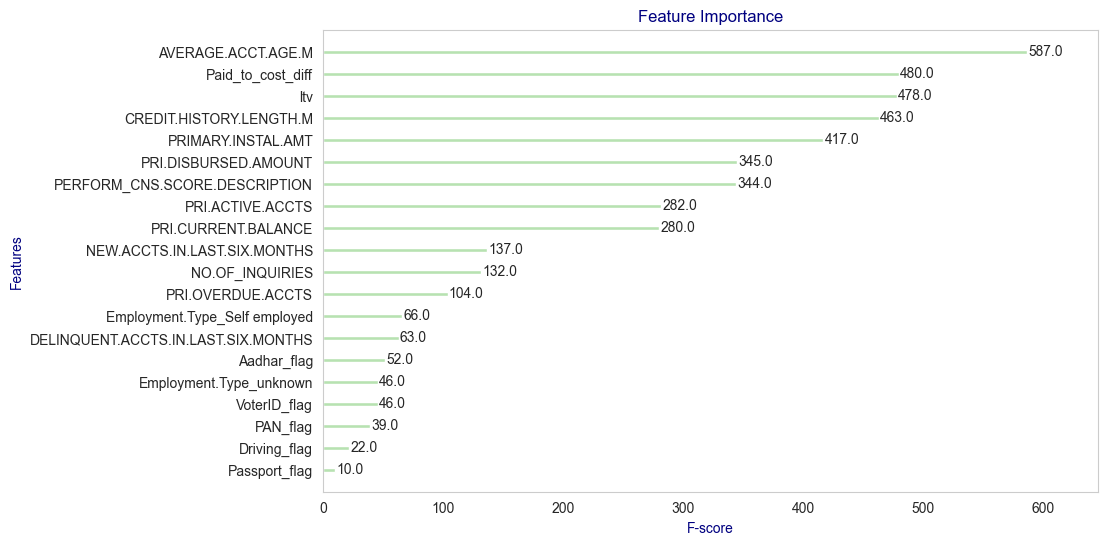

In [45]:
'''xgb.plot_importance(xgBoo)
plt.title('Feature Importance', color = 'red')
plt.xlabel('F-score', color = 'red')
plt.ylabel('Features', color = 'red')
plt.show()'''

_, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(xgBoo, ax=ax, color=piyg_palette[1])

# Remove the grid
ax.grid(False)

plt.title('Feature Importance', color='navy')
plt.xlabel('F-score', color='navy')
plt.ylabel('Features', color='navy')
plt.show()


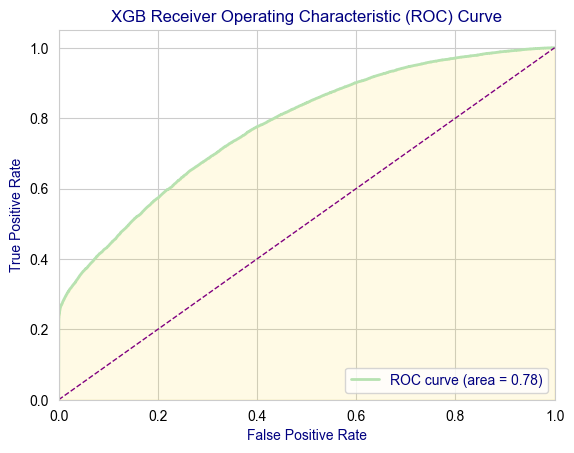

In [46]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(facecolor='white')
plt.plot(fpr, tpr, color=piyg_palette[1], lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'navy')
plt.ylabel('True Positive Rate', color = 'navy')
plt.tick_params(colors='black')
plt.title('XGB Receiver Operating Characteristic (ROC) Curve', color = 'navy')
plt.fill_between(fpr, tpr, color='gold', alpha=0.1)
leg = plt.legend(loc="lower right")
leg.get_texts()[0].set_color('navy')
plt.show()

In this project, three machine learning algorithms—Logistic Regression, Support Vector Machine, and GXBoost—were evaluated for their effectiveness in predicting vehicle loan defaults. GXBoost emerged as the clear winner, achieving an AUC score of 0.7960272504199912, which surpasses the 2019 DataScience FinHack winners by a significant 13% margin. Logistic Regression was primarily used to ensure appropriate model fitting due to its fast processing and ease of tuning; however, its performance was limited to 59% with the given feature setup. AUC-ROC graphs indicated that a linear model might not be the best fit for this dataset, suggesting the need to explore more flexible models.

Despite the success of the GXBoost model, there is potential for further improvement. Incorporating ID features as factors and applying logarithmic transformations to numeric features before standardization could enhance the model's performance. Additionally, using cloud services such as AWS can help overcome hardware limitations and enable the use of Grid Search for hyperparameter tuning with SVM. Future work could also involve applying this powerful combination of algorithms to purely numerical datasets to refine tuning techniques and optimize computational efficiency.

### References


([1](#ref1)) <a id="ref1"></a>Precedence Research. (2023). _Automotive Finance Market (By Provider Type: Banks, OEMs, Others; By Finance Type: Direct, Indirect; By Purpose Type: Loan, Leasing, Others; By Vehicle Type: Commercial Vehicles, Passenger Vehicles) - Global Industry Analysis, Size, Share, Growth, Trends, Regional Outlook, and Forecast 2023-2032_. [online] Available at: https://www.precedenceresearch.com/automotive-finance-market [Accessed 25 Apr. 2023].

([2](#ref2)) <a id="ref2"></a>Fortune Business Insights. (2022). _The global automotive finance market is projected to grow from $245.62 billion in 2021 to $385.42 billion in 2028 at a CAGR of 6.5% in forecast period, 2021-2028_. [online] Available at: https://www.fortunebusinessinsights.com/industry-reports/automotive-finance-market-100122 [Accessed 25 Apr. 2023].

([3](#ref3)) <a id="ref3"></a>Automotive Management online magazine. (2022). _UK car finance debt soars to £40bn_. [online] 2 Nov. Available at: https://www.am-online.com/news/finance/2022/11/02/uk-car-finance-debt-soars-to-40bn [Accessed 25 Apr. 2023].

([4](#ref4)) <a id="ref4"></a>Analytics Vidhya. (2019). _LTFS Data Science FinHack (ML Hackathon)_, 13-19 Apr. [online] Available at: https://datahack.analyticsvidhya.com/contest/ltfs-datascience-finhack-an-online-hackathon/#About [Accessed 25 Apr. 2023].


([5](#ref5)) <a id="ref5"></a>Mishra, S. (2019). _LTFS-Loan-Default-Prediction_. [online] GitHub. Available at: https://github.com/sauravmishra1710/LTFS-Loan-Default-Prediction [Accessed 25 Apr. 2023].

([6](#ref6)) <a id="ref6"></a>Bhavsar, N. (2019). _ltfs-vehicle-loan-default-prediction_. [online] GitHub. Available at: https://github.com/NishantBhavsar/ltfs-vehicle-loan-default-prediction [Accessed 25 Apr. 2023].

([7](#ref7)) <a id="ref7"></a>Bentéjac, C., Csörgő, A. and Martínez-Muñoz, G. (2021). A comparative analysis of gradient boosting algorithms. _Artificial Intelligence Review_, 54, pp.1937-1967. [online] Available at: https://doi.org/10.1007/s10462-020-09896-5 [Accessed 25 Apr. 2023].


([8](#ref8)) <a id="ref8"></a>Rao, C., Liu, Y. and Goh, M. (2022). Credit risk assessment mechanism of personal auto loan based on PSO-XGBoost Model. _Complex & Intelligent Systems_. https://doi.org/10.1007/s40747-022-00854-y




Project is completed with assistance of ChatGPT3.5 and 4: code debugging, grammar and syntaxis, text formatting.


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate


True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
$$ TPR = \frac{TP}{TP+FN} $$

False Positive Rate (FPR) is defined as follows:

$$ FPR = \frac{FP}{FP+TN} $$
